### **BÁO CÁO ĐỒ ÁN CUỐI KỲ**
# DỮ LIỆU LỚN - IS405.O21.HTCL
# ***ĐỀ TÀI: DỰ ĐOÁN NĂNG LỰC HỌC TẬP VÀ ĐIỂM THI CUỐI NĂM CỦA HỌC SINH***
# Danh sách thành viên:
1. Đỗ Huỳnh Mỹ Tâm - 20520746
2. Đinh Thị Tú Uyên - 20522139
3. Nguyễn Công Thành - 20521918
4. Nguyễn Phạm Thanh Phong - 21522458


### Data Source: https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics?resource=download

###  Thuật toán k-NN

In [1]:
import findspark
findspark.init()

In [2]:

import pyspark
from pyspark.sql import SparkSession

try:
    spark.stop()
except NameError:
    pass

# Tạo Spark session và cấu hình log4j
spark = SparkSession.builder \
    .appName("PROJECT") \
    .getOrCreate()

     #.master('spark://192.168.100.119:7077') \

[Thread-3] INFO org.apache.spark.SparkContext - SparkContext is stopping with exitCode 0.
[Thread-3] INFO org.sparkproject.jetty.server.AbstractConnector - Stopped Spark@70ba3c8b{HTTP/1.1, (http/1.1)}{0.0.0.0:4040}
[Thread-3] INFO org.apache.spark.ui.SparkUI - Stopped Spark web UI at http://192.168.1.24:4040
[dispatcher-event-loop-7] INFO org.apache.spark.MapOutputTrackerMasterEndpoint - MapOutputTrackerMasterEndpoint stopped!
[Thread-3] INFO org.apache.spark.storage.memory.MemoryStore - MemoryStore cleared
[Thread-3] INFO org.apache.spark.storage.BlockManager - BlockManager stopped
[Thread-3] INFO org.apache.spark.storage.BlockManagerMaster - BlockManagerMaster stopped
[dispatcher-event-loop-11] INFO org.apache.spark.scheduler.OutputCommitCoordinator$OutputCommitCoordinatorEndpoint - OutputCommitCoordinator stopped!
[Thread-3] INFO org.apache.spark.SparkContext - Successfully stopped SparkContext
[Thread-3] INFO org.apache.spark.SparkContext - Running Spark version 3.5.1
[Thread-3] IN

In [3]:
spark

[Thread-3] INFO org.apache.spark.sql.internal.SharedState - Setting hive.metastore.warehouse.dir ('null') to the value of spark.sql.warehouse.dir.
[Thread-3] INFO org.apache.spark.sql.internal.SharedState - Warehouse path is 'file:/home/mtam/Spark/spark-3.5.1-bin-hadoop3/spark-warehouse'.
[Thread-3] INFO org.sparkproject.jetty.server.handler.ContextHandler - Started o.s.j.s.ServletContextHandler@5c119b8b{/SQL,null,AVAILABLE,@Spark}
[Thread-3] INFO org.sparkproject.jetty.server.handler.ContextHandler - Started o.s.j.s.ServletContextHandler@5ffd78f2{/SQL/json,null,AVAILABLE,@Spark}
[Thread-3] INFO org.sparkproject.jetty.server.handler.ContextHandler - Started o.s.j.s.ServletContextHandler@caf951d{/SQL/execution,null,AVAILABLE,@Spark}
[Thread-3] INFO org.sparkproject.jetty.server.handler.ContextHandler - Started o.s.j.s.ServletContextHandler@3b05a77c{/SQL/execution/json,null,AVAILABLE,@Spark}
[Thread-3] INFO org.sparkproject.jetty.server.handler.ContextHandler - Started o.s.j.s.ServletCon

In [4]:
# Khởi tạo SparkContext
sc = spark.sparkContext

# Import các thư viện cần thiết

In [5]:
# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from plotnine import *


# Pyspark
from pyspark.sql.functions import *
from pyspark.sql import functions as f
from pyspark.sql.types import *
from pyspark.sql.window import Window

from operator import add, getitem
from collections import Counter

from numpy.linalg import norm
from math import sqrt


/home/mtam/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Đọc dữ liệu

In [6]:
df_math = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .option("escape", '"')\
    .option("na_values", ["", " ", "N/A", "NA"])\
    .load("Data_project/student_math_clean.csv")

df_math.cache()

[Thread-3] INFO org.apache.spark.sql.execution.datasources.InMemoryFileIndex - It took 49 ms to list leaf files for 1 paths.
[Thread-3] INFO org.apache.spark.sql.execution.datasources.InMemoryFileIndex - It took 2 ms to list leaf files for 1 paths.
[Thread-3] INFO org.apache.spark.sql.execution.datasources.FileSourceStrategy - Pushed Filters: 
[Thread-3] INFO org.apache.spark.sql.execution.datasources.FileSourceStrategy - Post-Scan Filters: (length(trim(value#0, None)) > 0)
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 246.210746 ms
[Thread-3] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_0 stored as values in memory (estimated size 200.1 KiB, free 434.2 MiB)
[Thread-3] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_0_piece0 stored as bytes in memory (estimated size 34.5 KiB, free 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Added broadcast_0_pie

[Executor task launch worker for task 0.0 in stage 1.0 (TID 1)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 67.811524 ms
[Executor task launch worker for task 0.0 in stage 1.0 (TID 1)] INFO org.apache.spark.sql.execution.datasources.FileScanRDD - Reading File path: file:///home/mtam/Spark/spark-3.5.1-bin-hadoop3/Data_project/student_math_clean.csv, range: 0-77747, partition values: [empty row]
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_0_piece0 on 192.168.1.24:39111 in memory (size: 34.5 KiB, free: 434.4 MiB)
[Executor task launch worker for task 0.0 in stage 1.0 (TID 1)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 1.0 (TID 1). 1817 bytes result sent to driver
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 1.0 (TID 1) in 401 ms on 192.168.1.24 (executor driver) (1/1)
[dag-scheduler-event-loop] INFO org.apache.s

DataFrame[student_id: int, school: string, sex: string, age: int, address_type: string, family_size: string, parent_status: string, mother_education: string, father_education: string, mother_job: string, father_job: string, school_choice_reason: string, guardian: string, travel_time: string, study_time: string, class_failures: int, school_support: string, family_support: string, extra_paid_classes: string, activities: string, nursery_school: string, higher_ed: string, internet_access: string, romantic_relationship: string, family_relationship: int, free_time: int, social: int, weekday_alcohol: int, weekend_alcohol: int, health: int, absences: int, grade_1: int, grade_2: int, final_grade: int]

In [7]:
df_portuguese = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .option("escape", '"')\
    .option("na_values", ["", " ", "N/A", "NA"])\
    .load("Data_project/student_portuguese_clean.csv")

df_portuguese.cache()

[Thread-3] INFO org.apache.spark.sql.execution.datasources.InMemoryFileIndex - It took 2 ms to list leaf files for 1 paths.
[Thread-3] INFO org.apache.spark.sql.execution.datasources.InMemoryFileIndex - It took 1 ms to list leaf files for 1 paths.
[Thread-3] INFO org.apache.spark.sql.execution.datasources.FileSourceStrategy - Pushed Filters: 
[Thread-3] INFO org.apache.spark.sql.execution.datasources.FileSourceStrategy - Post-Scan Filters: (length(trim(value#255, None)) > 0)
[Thread-3] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_4 stored as values in memory (estimated size 200.1 KiB, free 433.9 MiB)
[Thread-3] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_4_piece0 stored as bytes in memory (estimated size 34.5 KiB, free 433.9 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Added broadcast_4_piece0 in memory on 192.168.1.24:39111 (size: 34.5 KiB, free: 434.3 MiB)
[Thread-3] INFO org.apache.spark.SparkConte

DataFrame[student_id: int, school: string, sex: string, age: int, address_type: string, family_size: string, parent_status: string, mother_education: string, father_education: string, mother_job: string, father_job: string, school_choice_reason: string, guardian: string, travel_time: string, study_time: string, class_failures: int, school_support: string, family_support: string, extra_paid_classes: string, activities: string, nursery_school: string, higher_ed: string, internet_access: string, romantic_relationship: string, family_relationship: int, free_time: int, social: int, weekday_alcohol: int, weekend_alcohol: int, health: int, absences: int, grade_1: int, grade_2: int, final_grade: int]

# EDA

In [8]:
# Hiển thị thông tin dữ liệu
print('Portuguese')
print(f"Số dòng: {df_portuguese.count()}")
print(f"Số cột: {len(df_portuguese.columns)}")

display(df_portuguese)
df_portuguese.printSchema()

Portuguese


[Thread-3] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_8 stored as values in memory (estimated size 200.0 KiB, free 433.4 MiB)
[Thread-3] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_8_piece0 stored as bytes in memory (estimated size 34.4 KiB, free 433.4 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Added broadcast_8_piece0 in memory on 192.168.1.24:39111 (size: 34.4 KiB, free: 434.2 MiB)
[Thread-3] INFO org.apache.spark.SparkContext - Created broadcast 8 from count at NativeMethodAccessorImpl.java:0
[Thread-3] INFO org.apache.spark.sql.execution.FileSourceScanExec - Planning scan with bin packing, max size: 4194304 bytes, open cost is considered as scanning 4194304 bytes.
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 4 (count at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final s

[Executor task launch worker for task 0.0 in stage 5.0 (TID 5)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 5.0 (TID 5). 2156 bytes result sent to driver
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 5.0 (TID 5) in 191 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 5.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 5 (count at NativeMethodAccessorImpl.java:0) finished in 0.235 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - running: Set()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - waiting: Set()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - failed

Số dòng: 649
Số cột: 34


[Executor task launch worker for task 0.0 in stage 7.0 (TID 6)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 32.467535 ms
[Executor task launch worker for task 0.0 in stage 7.0 (TID 6)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 7.0 (TID 6). 3995 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 7.0 (TID 6) in 97 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 7.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 7 (count at NativeMethodAccessorImpl.java:0) finished in 0.120 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 6 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO org.apache.spark.s

DataFrame[student_id: int, school: string, sex: string, age: int, address_type: string, family_size: string, parent_status: string, mother_education: string, father_education: string, mother_job: string, father_job: string, school_choice_reason: string, guardian: string, travel_time: string, study_time: string, class_failures: int, school_support: string, family_support: string, extra_paid_classes: string, activities: string, nursery_school: string, higher_ed: string, internet_access: string, romantic_relationship: string, family_relationship: int, free_time: int, social: int, weekday_alcohol: int, weekend_alcohol: int, health: int, absences: int, grade_1: int, grade_2: int, final_grade: int]

root
 |-- student_id: integer (nullable = true)
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address_type: string (nullable = true)
 |-- family_size: string (nullable = true)
 |-- parent_status: string (nullable = true)
 |-- mother_education: string (nullable = true)
 |-- father_education: string (nullable = true)
 |-- mother_job: string (nullable = true)
 |-- father_job: string (nullable = true)
 |-- school_choice_reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- travel_time: string (nullable = true)
 |-- study_time: string (nullable = true)
 |-- class_failures: integer (nullable = true)
 |-- school_support: string (nullable = true)
 |-- family_support: string (nullable = true)
 |-- extra_paid_classes: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery_school: string (nullable = true)
 |-- higher_ed: string (nullable = true)
 |-- internet_access: string (nullab

In [9]:
# Hiển thị thông tin dữ liệu
print('Math')
print(f"Số dòng: {df_math.count()}")
print(f"Số cột: {len(df_math.columns)}")

display(df_math)
df_math.printSchema()

[Thread-3] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_12 stored as values in memory (estimated size 200.0 KiB, free 433.6 MiB)
[Thread-3] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_12_piece0 stored as bytes in memory (estimated size 34.4 KiB, free 433.6 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Added broadcast_12_piece0 in memory on 192.168.1.24:39111 (size: 34.4 KiB, free: 434.2 MiB)
[Thread-3] INFO org.apache.spark.SparkContext - Created broadcast 12 from count at NativeMethodAccessorImpl.java:0
[Thread-3] INFO org.apache.spark.sql.execution.FileSourceScanExec - Planning scan with bin packing, max size: 4194304 bytes, open cost is considered as scanning 4194304 bytes.
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 7 (count at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Fin

Math


[Executor task launch worker for task 0.0 in stage 8.0 (TID 7)] INFO org.apache.spark.storage.memory.MemoryStore - Block rdd_35_0 stored as values in memory (estimated size 26.5 KiB, free 433.5 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Added rdd_35_0 in memory on 192.168.1.24:39111 (size: 26.5 KiB, free: 434.2 MiB)
[Executor task launch worker for task 0.0 in stage 8.0 (TID 7)] INFO org.apache.spark.executor.Executor - 1 block locks were not released by task 0.0 in stage 8.0 (TID 7)
[rdd_35_0]
[Executor task launch worker for task 0.0 in stage 8.0 (TID 7)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 8.0 (TID 7). 1330 bytes result sent to driver
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 8.0 (TID 7) in 88 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 8.0, whose tasks have all c

Số dòng: 395
Số cột: 34


DataFrame[student_id: int, school: string, sex: string, age: int, address_type: string, family_size: string, parent_status: string, mother_education: string, father_education: string, mother_job: string, father_job: string, school_choice_reason: string, guardian: string, travel_time: string, study_time: string, class_failures: int, school_support: string, family_support: string, extra_paid_classes: string, activities: string, nursery_school: string, higher_ed: string, internet_access: string, romantic_relationship: string, family_relationship: int, free_time: int, social: int, weekday_alcohol: int, weekend_alcohol: int, health: int, absences: int, grade_1: int, grade_2: int, final_grade: int]

root
 |-- student_id: integer (nullable = true)
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address_type: string (nullable = true)
 |-- family_size: string (nullable = true)
 |-- parent_status: string (nullable = true)
 |-- mother_education: string (nullable = true)
 |-- father_education: string (nullable = true)
 |-- mother_job: string (nullable = true)
 |-- father_job: string (nullable = true)
 |-- school_choice_reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- travel_time: string (nullable = true)
 |-- study_time: string (nullable = true)
 |-- class_failures: integer (nullable = true)
 |-- school_support: string (nullable = true)
 |-- family_support: string (nullable = true)
 |-- extra_paid_classes: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery_school: string (nullable = true)
 |-- higher_ed: string (nullable = true)
 |-- internet_access: string (nullab

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_13_piece0 on 192.168.1.24:39111 in memory (size: 9.1 KiB, free: 434.3 MiB)


## Merging the two csv files

Đánh dấu môn học trước khi gộp 2 dataset lại 
+ portuguese: 0
+ math: 1

In [10]:
# Thêm cột portuguese cho math với giá trị 0
df_portuguese = df_portuguese.withColumn("subject_code", lit(0))

# Thêm cột subject_code cho math với giá trị 1
df_math = df_math.withColumn("subject_code", lit(1))


In [11]:
#Kiểm tra trước khi kết hợp
# Lấy danh sách các cột
cols_math = df_math.columns
cols_portuguese = df_portuguese.columns

# Kiểm tra xem các cột có giống nhau không
if cols_math != cols_portuguese:
    print("ERROR: Hai DataFrame không có cùng cấu trúc!")
else: 
    # Kết hợp hai DataFrame
    df = df_math.unionByName(df_portuguese)  
    print("OK")

OK


In [12]:
# Tạo một cột mới với giá trị ID tăng dần bắt đầu từ 1
df = df.withColumn("id_temp", monotonically_increasing_id())

# Sử dụng Window function để sắp xếp lại các ID từ 1 đến N
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

windowSpec = Window.orderBy("id_temp")
df = df.withColumn("id", row_number().over(windowSpec))

# Loại bỏ cột student_id và id_temp, giữ lại cột id với giá trị từ 1 đến N
df = df.drop("student_id", "id_temp")


Nhận thấy tên cột không ký tự đặc biệt, cũng không có khoảng cách.
Kiểu dữ liệu cũng phù hợp. 

### Thống kê thống kê các thuộc tính định lượng như: count, max, min, mean, stddev, tứ phân vị...

In [13]:
df.summary().show()

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_15_piece0 on 192.168.1.24:39111 in memory (size: 5.9 KiB, free: 434.3 MiB)
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_14_piece0 on 192.168.1.24:39111 in memory (size: 12.4 KiB, free: 434.3 MiB)
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.Window

[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_17 stored as values in memory (estimated size 382.6 KiB, free 433.5 MiB)
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_17_piece0 stored as bytes in memory (estimated size 97.3 KiB, free 433.4 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Added broadcast_17_piece0 in memory on 192.168.1.24:39111 (size: 97.3 KiB, free: 434.2 MiB)
[dag-scheduler-event-loop] INFO org.apache.spark.SparkContext - Created broadcast 17 from broadcast at DAGScheduler.scala:1585
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting 1 missing tasks from ResultStage 14 (MapPartitionsRDD[62] at showString at NativeMethodAccessorImpl.java:0) (first 15 tasks are for partitions Vector(0))
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Adding task set 14.0 with 1 tasks resource 

+-------+------+----+------------------+------------+--------------------+---------------+-------------------+-------------------+----------+----------+--------------------+--------+-------------+------------+-------------------+--------------+--------------+------------------+----------+--------------+---------+---------------+---------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-------------------+-----------------+
|summary|school| sex|               age|address_type|         family_size|  parent_status|   mother_education|   father_education|mother_job|father_job|school_choice_reason|guardian|  travel_time|  study_time|     class_failures|school_support|family_support|extra_paid_classes|activities|nursery_school|higher_ed|internet_access|romantic_relationship|family_relationship|         free_time|            social|   weekday

[Executor task launch worker for task 0.0 in stage 14.0 (TID 12)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 14.0 (TID 12). 7527 bytes result sent to driver
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 14.0 (TID 12) in 2528 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 14.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 14 (showString at NativeMethodAccessorImpl.java:0) finished in 2.824 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 11 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Killing all running tasks in stage 14: Stage finished
[Thread-3] INFO org.apache.spark.scheduler.DAGScheduler - Job 11 fi

### Thống kê số dòng null trong tập dữ liệu

In [14]:
# Thống kê Lượng giá trị null cho từng cột
null_counts = df.agg(*[count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
total_null_counts_percent = null_counts.agg(*[sum(col(c)).alias(c) for c in df.columns])

# Phần trăm missing data
total_rows = df.count()
null_percentages = null_counts.select(*[(col(c) / total_rows).alias(c + '_percent') for c in null_counts.columns])

# Hiển thị
missing_data = null_counts.union(null_percentages).toPandas().transpose()
missing_data.columns = ["Number missing","Percent %"]
missing_data = missing_data.sort_values(by="Percent %", ascending=False)
display(missing_data)

[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 71 (count at NativeMethodAccessorImpl.java:0) as input to shuffle 3
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 12 (count at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 15 (count at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 15 (MapPartitionsRDD[71] at count at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_18 stored as values in memory (e

[Executor task launch worker for task 1.0 in stage 19.0 (TID 19)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 40.610801 ms
[Executor task launch worker for task 0.0 in stage 19.0 (TID 18)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 19.0 (TID 18). 2354 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 19.0 (TID 18) in 57 ms on 192.168.1.24 (executor driver) (1/2)
[Executor task launch worker for task 1.0 in stage 19.0 (TID 19)] INFO org.apache.spark.executor.Executor - Finished task 1.0 in stage 19.0 (TID 19). 2354 bytes result sent to driver
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 1.0 in stage 19.0 (TID 19) in 64 ms on 192.168.1.24 (executor driver) (2/2)
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 19.0, whose tasks have all completed, from pool 
[d

,Number missing,Percent %
school,0.0,0.0
weekday_alcohol,0.0,0.0
higher_ed,0.0,0.0
internet_access,0.0,0.0
romantic_relationship,0.0,0.0
family_relationship,0.0,0.0
free_time,0.0,0.0
social,0.0,0.0
weekend_alcohol,0.0,0.0
activities,0.0,0.0


# Data preprocessing

### Trước tiên cần loại bỏ các thuộc tính không cần thiết và ít ảnh hưởng đến mô hình dự đoán

### Trong tập dữ liệu, nhóm sẽ ưu tiên giữ các thuộc tính liên quan đến việc học (nhóm 1) và về học sinh (nhóm 2), hơn là về gia đình học sinh (nhóm 3):
#### Nhóm 1:
+ class_failures, study_time, absences, grade_1, grade_2
+ school_choice_reason, travel_time, school_support, family_support, extra_paid_classes, higher_ed, internet_access

#### Nhóm 2:
+ sex, age, address_type, activities, romantic_relationship, family_relationship, free_time, social, weekday_alcohol, weekend_alcohol, health, nursery_school

#### Nhóm 3:
+ family_size, parent_status, mother_education, father_education, mother_job, father_job, guardian

In [15]:
# Bỏ đi tính cá nhân trong tập dữ liệu
drop_cols_1 = ['student_id', 'school']

# Bỏ các thuộc tính ít cần
drop_cols_2 = ['family_size', 'parent_status', 'mother_job', 'father_job','nursery_school', 'travel_time']

# Kết hợp cả hai danh sách
drop_cols = drop_cols_1 + drop_cols_2
df = df.drop(*drop_cols)

In [16]:
df.printSchema()

root
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address_type: string (nullable = true)
 |-- mother_education: string (nullable = true)
 |-- father_education: string (nullable = true)
 |-- school_choice_reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- study_time: string (nullable = true)
 |-- class_failures: integer (nullable = true)
 |-- school_support: string (nullable = true)
 |-- family_support: string (nullable = true)
 |-- extra_paid_classes: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- higher_ed: string (nullable = true)
 |-- internet_access: string (nullable = true)
 |-- romantic_relationship: string (nullable = true)
 |-- family_relationship: integer (nullable = true)
 |-- free_time: integer (nullable = true)
 |-- social: integer (nullable = true)
 |-- weekday_alcohol: integer (nullable = true)
 |-- weekend_alcohol: integer (nullable = true)
 |-- health: integer (nullable = true)
 |-- absen

In [17]:
# Hiển thị DataFrame kết hợp
print(f"Số dòng: {df.count()}")
print(f"Số cột: {len(df.columns)}")

df.show(1)
df.printSchema()

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_20_piece0 on 192.168.1.24:39111 in memory (size: 28.9 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_22_piece0 on 192.168.1.24:39111 in memory (size: 21.2 KiB, free: 434.1 MiB)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 107 (count at NativeMethodAccessorImpl.java:0) as input to shuffle 6
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 17 (count at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 23 (count at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - 

Số dòng: 1044
Số cột: 28


[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 4.226579 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 8.383202 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 9.129316 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 16.759314 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 122 (showString at NativeMethodAccessorImpl.java:0) as input to shuffle 7
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 19 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 27 (showString at Nati

+---+---+------------+----------------+----------------+--------------------+--------+------------+--------------+--------------+--------------+------------------+----------+---------+---------------+---------------------+-------------------+---------+------+---------------+---------------+------+--------+-------+-------+-----------+------------+---+
|sex|age|address_type|mother_education|father_education|school_choice_reason|guardian|  study_time|class_failures|school_support|family_support|extra_paid_classes|activities|higher_ed|internet_access|romantic_relationship|family_relationship|free_time|social|weekday_alcohol|weekend_alcohol|health|absences|grade_1|grade_2|final_grade|subject_code| id|
+---+---+------------+----------------+----------------+--------------------+--------+------------+--------------+--------------+--------------+------------------+----------+---------+---------------+---------------------+-------------------+---------+------+---------------+---------------+---

[Executor task launch worker for task 0.0 in stage 26.0 (TID 25)] INFO org.apache.spark.storage.BlockManager - Found block rdd_35_0 locally
[Executor task launch worker for task 1.0 in stage 26.0 (TID 26)] INFO org.apache.spark.storage.BlockManager - Found block rdd_23_0 locally
[Executor task launch worker for task 1.0 in stage 26.0 (TID 26)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 14.561931 ms
[Executor task launch worker for task 0.0 in stage 26.0 (TID 25)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 8.749792 ms
[Executor task launch worker for task 1.0 in stage 26.0 (TID 26)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 15.619097 ms
[Executor task launch worker for task 0.0 in stage 26.0 (TID 25)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 12.992276 ms
[Executor task launch worker for task 0.0 in stag

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_23_piece0 on 192.168.1.24:39111 in memory (size: 16.3 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_26_piece0 on 192.168.1.24:39111 in memory (size: 27.0 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_25_piece0 on 192.168.1.24:39111 in memory (size: 28.3 KiB, free: 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_24_piece0 on 192.168.1.24:39111 in memory (size: 5.9 KiB, free: 434.2 MiB)
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 140.600645 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 7.957004 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGener

[Executor task launch worker for task 0.0 in stage 30.0 (TID 30)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 30.0 (TID 30). 5958 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 30.0 (TID 30) in 122 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 30.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 30 (toPandas at /tmp/ipykernel_14509/2560516005.py:8) finished in 0.133 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - running: Set()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - waiting: Set()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGSc

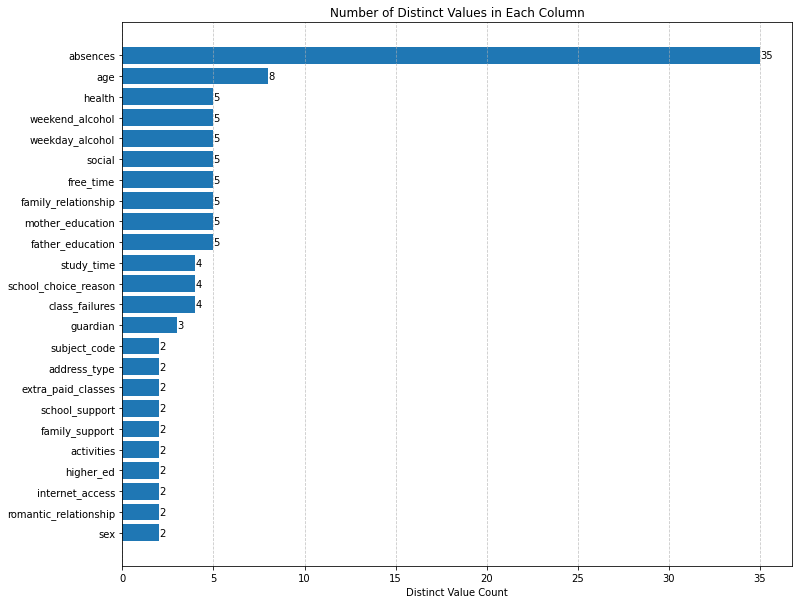

In [18]:

# Loại bỏ cột student_id, grade_1, grade_2, final_grade không cần xem số giá trị duy nhất
df_distinct = df.drop("id", "grade_1", "grade_2", "final_grade")

# Tính số giá trị duy nhất của từng cột hiện tại
distinct_counts = df_distinct.agg(*(countDistinct(col(c)).alias(c) for c in df_distinct.columns))

# Chuyển kết quả sang Pandas DataFrame (dữ liệu sau khi count nhỏ)
distinct_counts_pd = distinct_counts.toPandas().T.reset_index()
distinct_counts_pd.columns = ['column', 'distinct_count']

# Sắp xếp kết quả từ ít giá trị nhất đến nhiều giá trị nhất
sorted_distinct_counts_pd = distinct_counts_pd.sort_values(by='distinct_count')

# Vẽ biểu đồ
plt.figure(figsize=(12, 10))
bars = plt.barh(sorted_distinct_counts_pd['column'], sorted_distinct_counts_pd['distinct_count'])
plt.xlabel('Distinct Value Count')
plt.title('Number of Distinct Values in Each Column')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Thêm giá trị label cho mỗi bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', ha='left')

plt.show() 

## Xử lý các thuộc tính non-numberic 

### Sau khi loại bỏ ta sẽ tiến hành xử lý các thuộc tính non-numberic còn lại

### 1. Dạng thuộc tính non-binary 

#### 1.1 Cột mother_education, và father_education

In [19]:
df.select("mother_education", "father_education").show(truncate=False)

+-----------------------------+-----------------------------+
|mother_education             |father_education             |
+-----------------------------+-----------------------------+
|higher education             |higher education             |
|primary education (4th grade)|primary education (4th grade)|
|primary education (4th grade)|primary education (4th grade)|
|higher education             |5th to 9th grade             |
|secondary education          |secondary education          |
|higher education             |secondary education          |
|5th to 9th grade             |5th to 9th grade             |
|higher education             |higher education             |
|secondary education          |5th to 9th grade             |
|secondary education          |higher education             |
|higher education             |higher education             |
|5th to 9th grade             |primary education (4th grade)|
|higher education             |higher education             |
|higher 

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 4.062306 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 11.605445 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 23 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 34 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 34 (MapPartitionsRDD[154] at showString at NativeMethodAcce

In [20]:
# Lấy tất cả các thể loại duy nhất
unique_mother_edu_df = df.select("mother_education").distinct()
unique_father_edu_df = df.select("father_education").distinct()

# Loại bỏ các dòng có giá trị rỗng trong cột "mother_education"
unique_mother_edu_df.show(truncate=False)
unique_father_edu_df.show(truncate=False)

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 26.638898 ms
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 163 (showString at NativeMethodAccessorImpl.java:0) as input to shuffle 10
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 24 (showString at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 35 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 35 (MapPartitionsRDD[163] at showString at NativeMethodAccessorImpl.java:0), which has no missin

[Executor task launch worker for task 0.0 in stage 37.0 (TID 35)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 82.180974 ms
[Executor task launch worker for task 0.0 in stage 37.0 (TID 35)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 37.0 (TID 35). 5423 bytes result sent to driver
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 37.0 (TID 35) in 109 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 37.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 37 (showString at NativeMethodAccessorImpl.java:0) finished in 0.121 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 25 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO o

+-----------------------------+
|mother_education             |
+-----------------------------+
|5th to 9th grade             |
|none                         |
|secondary education          |
|primary education (4th grade)|
|higher education             |
+-----------------------------+

+-----------------------------+
|father_education             |
+-----------------------------+
|5th to 9th grade             |
|none                         |
|secondary education          |
|primary education (4th grade)|
|higher education             |
+-----------------------------+



[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 27 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 40 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 39)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 40 (MapPartitionsRDD[178] at showString at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_34 stored as values in memory (estimated size 63.3 KiB, free 433.6

In [21]:
# Chuyển danh sách học vấn thành một danh sách Python
list_mother_edu = [row["mother_education"] for row in unique_mother_edu_df.toLocalIterator()]
list_father_edu = [row["father_education"] for row in unique_father_edu_df.toLocalIterator()]

# Thêm cột cho mỗi thể loại và gán giá trị 1 nếu thể loại đó xuất hiện, ngược lại gán giá trị 0
for mother_edu in list_mother_edu:
    mother_edu_column_name = f"mother_education_is_{mother_edu.replace(' ', '_')}"
    df = df.withColumn(mother_edu_column_name, col("mother_education").contains(mother_edu).cast("int"))

for father_edu in list_father_edu:
    father_edu_column_name = f"father_education_is_{father_edu.replace(' ', '_')}"
    df = df.withColumn(father_edu_column_name, col("father_education").contains(father_edu).cast("int"))
    

[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 187 (toLocalIterator at /tmp/ipykernel_14509/3529010242.py:2) as input to shuffle 12
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 28 (toLocalIterator at /tmp/ipykernel_14509/3529010242.py:2) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 41 (toLocalIterator at /tmp/ipykernel_14509/3529010242.py:2)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 41 (MapPartitionsRDD[187] at toLocalIterator at /tmp/ipykernel_14509/3529010242.py:2), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory

[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 201 (toLocalIterator at /tmp/ipykernel_14509/3529010242.py:3) as input to shuffle 13
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 30 (toLocalIterator at /tmp/ipykernel_14509/3529010242.py:3) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 44 (toLocalIterator at /tmp/ipykernel_14509/3529010242.py:3)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 44 (MapPartitionsRDD[201] at toLocalIterator at /tmp/ipykernel_14509/3529010242.py:3), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory

In [22]:
# Chọn cột "mother_education" và các cột bắt đầu từ "5th to 9th grade" trở đi và hiển thị
df.select(["mother_education", "father_education"] + [col(column) for column in df.columns[df.columns.index("mother_education_is_5th_to_9th_grade"):]]).show(truncate=False)

+-----------------------------+-----------------------------+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+
|mother_education             |father_education             |mother_education_is_5th_to_9th_grade|mother_education_is_none|mother_education_is_secondary_education|mother_education_is_primary_education_(4th_grade)|mother_education_is_higher_education|father_education_is_5th_to_9th_grade|father_education_is_none|father_education_is_secondary_education|father_education_is_primary_education_(4th_grade)|father_education_is_higher_education|
+-----------------------------+-----------------------------+------------------------------------+----------------------

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 11.373183 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 9.666768 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 32 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 47 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 47 (MapPartitionsRDD[216] at showString at NativeMethodAcce

In [23]:
# Tiến hành xóa sau khi xử lý xong
df = df.drop("mother_education", "father_education")

#### 1.2. school_choice_reason, guardian

In [24]:
df.select("school_choice_reason", "guardian").show(truncate=False)

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 4.829756 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 4.371597 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 33 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 48 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 48 (MapPartitionsRDD[226] at showString at NativeMethodAcces

+--------------------+--------+
|school_choice_reason|guardian|
+--------------------+--------+
|course              |mother  |
|course              |father  |
|other               |mother  |
|home                |mother  |
|home                |father  |
|reputation          |mother  |
|home                |mother  |
|home                |mother  |
|home                |mother  |
|home                |mother  |
|reputation          |mother  |
|reputation          |father  |
|course              |father  |
|course              |mother  |
|home                |other   |
|home                |mother  |
|reputation          |mother  |
|reputation          |mother  |
|course              |mother  |
|home                |father  |
+--------------------+--------+
only showing top 20 rows



[Executor task launch worker for task 0.0 in stage 48.0 (TID 46)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 48.0 (TID 46). 2174 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 48.0 (TID 46) in 10 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 48.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 48 (showString at NativeMethodAccessorImpl.java:0) finished in 0.014 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 33 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Killing all running tasks in stage 48: Stage finished
[Thread-3] INFO org.apache.spark.scheduler.DAGScheduler - Job 33 fini

In [25]:
# Lấy tất cả các giá trị duy nhất
unique_school_choice_reason_df = df.select("school_choice_reason").distinct()
unique_guardian_df = df.select("guardian").distinct()

unique_school_choice_reason_df.show(truncate=False)
unique_guardian_df.show(truncate=False)

[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 235 (showString at NativeMethodAccessorImpl.java:0) as input to shuffle 14
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 34 (showString at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 49 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 49 (MapPartitionsRDD[235] at showString at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_41 stored

+--------------------+
|school_choice_reason|
+--------------------+
|reputation          |
|course              |
|other               |
|home                |
+--------------------+



[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 247 (showString at NativeMethodAccessorImpl.java:0) as input to shuffle 15
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 36 (showString at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 52 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 52 (MapPartitionsRDD[247] at showString at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_43 stored

+--------+
|guardian|
+--------+
|father  |
|mother  |
|other   |
+--------+



[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 37 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 54 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 53)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 54 (MapPartitionsRDD[250] at showString at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_44 stored as values in memory (estimated size 63.3 KiB, free 433.7

In [26]:
# Chuyển danh sách học vấn thành một danh sách Python
list_school_choice = [row["school_choice_reason"] for row in unique_school_choice_reason_df.toLocalIterator()]
list_guardian = [row["guardian"] for row in unique_guardian_df.toLocalIterator()]

# Thêm cột cho mỗi thể loại và gán giá trị 1 nếu thể loại đó xuất hiện, ngược lại gán giá trị 0
for school_choice in list_school_choice:
    school_choice_column_name = f"{school_choice.replace(' ', '_')}_school_choice"
    df = df.withColumn(school_choice_column_name, col("school_choice_reason").contains(school_choice).cast("int"))

for guardian in list_guardian:
    guardian_column_name = f"{guardian.replace(' ', '_')}_guardian"
    df = df.withColumn(guardian_column_name, col("guardian").contains(guardian).cast("int"))
    

[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 259 (toLocalIterator at /tmp/ipykernel_14509/3840655776.py:2) as input to shuffle 16
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 38 (toLocalIterator at /tmp/ipykernel_14509/3840655776.py:2) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 55 (toLocalIterator at /tmp/ipykernel_14509/3840655776.py:2)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 55 (MapPartitionsRDD[259] at toLocalIterator at /tmp/ipykernel_14509/3840655776.py:2), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory

[Executor task launch worker for task 0.0 in stage 60.0 (TID 58)] INFO org.apache.spark.storage.ShuffleBlockFetcherIterator - Getting 2 (320.0 B) non-empty blocks including 2 (320.0 B) local and 0 (0.0 B) host-local and 0 (0.0 B) push-merged-local and 0 (0.0 B) remote blocks
[Executor task launch worker for task 0.0 in stage 60.0 (TID 58)] INFO org.apache.spark.storage.ShuffleBlockFetcherIterator - Started 0 remote fetches in 0 ms
[Executor task launch worker for task 0.0 in stage 60.0 (TID 58)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 60.0 (TID 58). 5552 bytes result sent to driver
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 60.0 (TID 58) in 16 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 60.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Result

In [27]:
df.select(["school_choice_reason", "guardian"] + [col(column) for column in df.columns[df.columns.index("reputation_school_choice"):]]).show(truncate=False)

+--------------------+--------+------------------------+--------------------+-------------------+------------------+---------------+---------------+--------------+
|school_choice_reason|guardian|reputation_school_choice|course_school_choice|other_school_choice|home_school_choice|father_guardian|mother_guardian|other_guardian|
+--------------------+--------+------------------------+--------------------+-------------------+------------------+---------------+---------------+--------------+
|course              |mother  |0                       |1                   |0                  |0                 |0              |1              |1             |
|course              |father  |0                       |1                   |0                  |0                 |1              |0              |0             |
|other               |mother  |0                       |0                   |1                  |0                 |0              |1              |1             |
|home           

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 10.873383 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 8.213719 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 42 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 61 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 61 (MapPartitionsRDD[288] at showString at NativeMethodAcce

In [28]:
# Tiến hành xóa sau khi xử lý xong
df = df.drop("school_choice_reason", "guardian")

#### 1.4. study_time

In [29]:
df.select("study_time").show(truncate=False)

+-------------+
|study_time   |
+-------------+
|2 to 5 hours |
|2 to 5 hours |
|2 to 5 hours |
|5 to 10 hours|
|2 to 5 hours |
|2 to 5 hours |
|2 to 5 hours |
|2 to 5 hours |
|2 to 5 hours |
|2 to 5 hours |
|2 to 5 hours |
|5 to 10 hours|
|<2 hours     |
|2 to 5 hours |
|5 to 10 hours|
|<2 hours     |
|5 to 10 hours|
|2 to 5 hours |
|<2 hours     |
|<2 hours     |
+-------------+
only showing top 20 rows



[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 3.693415 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 2.962793 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 43 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 62 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 62 (MapPartitionsRDD[298] at showString at NativeMethodAcces

In [30]:
# Lấy tất cả các giá trị duy nhất
unique_study_time_df = df.select("study_time").distinct()

unique_study_time_df.show(truncate=False)

+-------------+
|study_time   |
+-------------+
|5 to 10 hours|
|>10 hours    |
|<2 hours     |
|2 to 5 hours |
+-------------+



[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 307 (showString at NativeMethodAccessorImpl.java:0) as input to shuffle 18
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 44 (showString at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 63 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 63 (MapPartitionsRDD[307] at showString at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_51 stored

In [31]:
# Chuyển đổi cột travel_time thành giá trị số

df = df.withColumn("study_time_encoded", 
                   when(col("study_time") == "<2 hours", 0)
                   .when(col("study_time") == "2 to 5 hours", 1)
                   .when(col("study_time") == "5 to 10 hours", 2)
                   .otherwise(3))


df.select("study_time","study_time_encoded").show(truncate=False)

+-------------+------------------+
|study_time   |study_time_encoded|
+-------------+------------------+
|2 to 5 hours |1                 |
|2 to 5 hours |1                 |
|2 to 5 hours |1                 |
|5 to 10 hours|2                 |
|2 to 5 hours |1                 |
|2 to 5 hours |1                 |
|2 to 5 hours |1                 |
|2 to 5 hours |1                 |
|2 to 5 hours |1                 |
|2 to 5 hours |1                 |
|2 to 5 hours |1                 |
|5 to 10 hours|2                 |
|<2 hours     |0                 |
|2 to 5 hours |1                 |
|5 to 10 hours|2                 |
|<2 hours     |0                 |
|5 to 10 hours|2                 |
|2 to 5 hours |1                 |
|<2 hours     |0                 |
|<2 hours     |0                 |
+-------------+------------------+
only showing top 20 rows



[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 6.449475 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 6.304228 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 46 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 66 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 66 (MapPartitionsRDD[320] at showString at NativeMethodAcces

In [32]:
df = df.drop("study_time")

### 2. Dạng thuộc tính binary (có 2 giá trị)

sex, address_type, family_size, parent_status

In [33]:
columns = ["sex", "address_type"] 

df.select(columns).show(truncate=False)

+---+------------+
|sex|address_type|
+---+------------+
|F  |Urban       |
|F  |Urban       |
|F  |Urban       |
|F  |Urban       |
|F  |Urban       |
|M  |Urban       |
|M  |Urban       |
|F  |Urban       |
|M  |Urban       |
|M  |Urban       |
|F  |Urban       |
|F  |Urban       |
|M  |Urban       |
|M  |Urban       |
|M  |Urban       |
|F  |Urban       |
|F  |Urban       |
|F  |Urban       |
|M  |Urban       |
|M  |Urban       |
+---+------------+
only showing top 20 rows



[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 4.27332 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 3.97438 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 47 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 67 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 67 (MapPartitionsRDD[330] at showString at NativeMethodAccesso

In [34]:
for col in columns:
    df.select(col).distinct().show(truncate=False)


[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 339 (showString at NativeMethodAccessorImpl.java:0) as input to shuffle 19
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 48 (showString at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 68 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 68 (MapPartitionsRDD[339] at showString at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_55 stored

+---+
|sex|
+---+
|F  |
|M  |
+---+



[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 70.0 (TID 68) in 10 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 70.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 70 (showString at NativeMethodAccessorImpl.java:0) finished in 0.014 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 49 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Killing all running tasks in stage 70: Stage finished
[Thread-3] INFO org.apache.spark.scheduler.DAGScheduler - Job 49 finished: showString at NativeMethodAccessorImpl.java:0, took 0.016852 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 351 (showString at Nativ

+------------+
|address_type|
+------------+
|Urban       |
|Rural       |
+------------+



[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at NativeMethodAccessorImpl.java:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 51 (showString at NativeMethodAccessorImpl.java:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 73 (showString at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 72)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 73 (MapPartitionsRDD[354] at showString at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_58 stored as values in memory (estimated size 63.3 KiB, free 433.6

In [35]:
distinct_values = []

# Lặp qua các cột và lưu các giá trị distinct vào mảng 2 chiều
for column_name in columns:
    distinct_set = set(df.select(column_name).distinct().rdd.flatMap(lambda x: x).toLocalIterator())
    distinct_set.discard(None)
    distinct_values.append(list(distinct_set))

# Hiển thị kết quả
for i, col in enumerate(columns):
    print(f"Distinct values for column '{col}': {distinct_values[i]}")

# In kết quả mảng 2 chiều
print("2D Array of distinct values:")
for row in distinct_values:
    print(row)


[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 363 (javaToPython at NativeMethodAccessorImpl.java:0) as input to shuffle 21
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 52 (javaToPython at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 74 (javaToPython at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 74 (MapPartitionsRDD[363] at javaToPython at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_5

Distinct values for column 'sex': ['M', 'F']
Distinct values for column 'address_type': ['Urban', 'Rural']
2D Array of distinct values:
['M', 'F']
['Urban', 'Rural']


[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 55 (toLocalIterator at /tmp/ipykernel_14509/4095349155.py:5) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 79 (toLocalIterator at /tmp/ipykernel_14509/4095349155.py:5)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 78)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 79 (PythonRDD[384] at toLocalIterator at /tmp/ipykernel_14509/4095349155.py:5), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_62 stored as values in memory (estimated size 68.7 KiB, free 433.3 MiB)
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - B

In [36]:
for i, col_name in enumerate(columns):
    first_value = distinct_values[i][0]
    first_value = first_value.replace(' ', '_')
    new_col_name = col_name + "_is_" + first_value
    df = df.withColumn(new_col_name, when(df[col_name] == first_value, 1).otherwise(0))

# Hiển thị DataFrame kết quả
df.show()

[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[dispatcher-Blo

+---+---+------------+--------------+--------------+--------------+------------------+----------+---------+---------------+---------------------+-------------------+---------+------+---------------+---------------+------+--------+-------+-------+-----------+------------+---+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------+--------------------+-------------------+------------------+---------------+---------------+--------------+------------------+--------+---------------------+
|sex|age|address_type|class_failures|school_support|family_support|extra_paid_classes|activities|higher_ed|internet_access|romantic_relationship|family_relationship

In [37]:

df.select("sex", "address_type", "sex_is_M", "address_type_is_Urban").show()

+---+------------+--------+---------------------+
|sex|address_type|sex_is_M|address_type_is_Urban|
+---+------------+--------+---------------------+
|  F|       Urban|       0|                    1|
|  F|       Urban|       0|                    1|
|  F|       Urban|       0|                    1|
|  F|       Urban|       0|                    1|
|  F|       Urban|       0|                    1|
|  M|       Urban|       1|                    1|
|  M|       Urban|       1|                    1|
|  F|       Urban|       0|                    1|
|  M|       Urban|       1|                    1|
|  M|       Urban|       1|                    1|
|  F|       Urban|       0|                    1|
|  F|       Urban|       0|                    1|
|  M|       Urban|       1|                    1|
|  M|       Urban|       1|                    1|
|  M|       Urban|       1|                    1|
|  F|       Urban|       0|                    1|
|  F|       Urban|       0|                    1|


[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 4.803679 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 4.473462 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at <unknown>:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 57 (showString at <unknown>:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 82 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 82 (MapPartitionsRDD[411] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO or

In [38]:
# Xóa cột release_date
df = df.drop("sex", "address_type")

### Yes No 
"school_support", "family_support", "extra_paid_classes", "activities", "higher_ed", "internet_access", "romantic_relationship"

In [39]:
columns = ["school_support", "family_support",
           "extra_paid_classes", "activities",
           "higher_ed", "internet_access",
           "romantic_relationship"]

df.select(columns).show(truncate=False)

+--------------+--------------+------------------+----------+---------+---------------+---------------------+
|school_support|family_support|extra_paid_classes|activities|higher_ed|internet_access|romantic_relationship|
+--------------+--------------+------------------+----------+---------+---------------+---------------------+
|yes           |no            |no                |no        |yes      |no             |no                   |
|no            |yes           |no                |no        |yes      |yes            |no                   |
|yes           |no            |yes               |no        |yes      |yes            |no                   |
|no            |yes           |yes               |yes       |yes      |yes            |yes                  |
|no            |yes           |yes               |no        |yes      |no             |no                   |
|no            |yes           |yes               |yes       |yes      |yes            |no                   |
|no       

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 4.626759 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 3.833707 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at <unknown>:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 58 (showString at <unknown>:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 83 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 83 (MapPartitionsRDD[421] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO or

In [40]:
for col in columns:
    df.select(col).distinct().show(truncate=False)


[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 430 (showString at <unknown>:0) as input to shuffle 24
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 59 (showString at <unknown>:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 84 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 84 (MapPartitionsRDD[430] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_67 stored as values in memory (estimated size 49.8 KiB, free 433.5 MiB)
[dag-scheduler-ev

+--------------+
|school_support|
+--------------+
|no            |
|yes           |
+--------------+



[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 442 (showString at <unknown>:0) as input to shuffle 25
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 61 (showString at <unknown>:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 87 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 87 (MapPartitionsRDD[442] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_69 stored as values in memory (estimated size 49.8 KiB, free 433.3 MiB)
[dag-scheduler-ev

+--------------+
|family_support|
+--------------+
|no            |
|yes           |
+--------------+



[Executor task launch worker for task 0.0 in stage 89.0 (TID 88)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 89.0 (TID 88). 5373 bytes result sent to driver
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 89.0 (TID 88) in 14 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 89.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 89 (showString at <unknown>:0) finished in 0.018 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 62 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Killing all running tasks in stage 89: Stage finished
[Thread-3] INFO org.apache.spark.scheduler.DAGScheduler - Job 62 finished: showString at 

+------------------+
|extra_paid_classes|
+------------------+
|no                |
|yes               |
+------------------+



[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 466 (showString at <unknown>:0) as input to shuffle 27
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 65 (showString at <unknown>:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 93 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 93 (MapPartitionsRDD[466] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_73 stored as values in memory (estimated size 49.8 KiB, free 433.6 MiB)
[dag-scheduler-ev

+----------+
|activities|
+----------+
|no        |
|yes       |
+----------+



[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 478 (showString at <unknown>:0) as input to shuffle 28
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 67 (showString at <unknown>:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 96 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 96 (MapPartitionsRDD[478] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_75 stored as values in memory (estimated size 49.8 KiB, free 433.4 MiB)
[dag-scheduler-ev

+---------+
|higher_ed|
+---------+
|no       |
|yes      |
+---------+



[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 490 (showString at <unknown>:0) as input to shuffle 29
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 69 (showString at <unknown>:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 99 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 99 (MapPartitionsRDD[490] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_77 stored as values in memory (estimated size 49.8 KiB, free 433.3 MiB)
[dag-scheduler-ev

+---------------+
|internet_access|
+---------------+
|no             |
|yes            |
+---------------+

+---------------------+
|romantic_relationship|
+---------------------+
|no                   |
|yes                  |
+---------------------+



[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_71_piece0 on 192.168.1.24:39111 in memory (size: 20.4 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_77_piece0 on 192.168.1.24:39111 in memory (size: 20.4 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_70_piece0 on 192.168.1.24:39111 in memory (size: 26.4 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_72_piece0 on 192.168.1.24:39111 in memory (size: 26.3 KiB, free: 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_78_piece0 on 192.168.1.24:39111 in memory (size: 26.3 KiB, free: 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_76_piece0 on 192.168.1.24:

In [41]:
from pyspark.sql.functions import when, col

# Lặp qua các cột và thay thế giá trị "yes" bằng 1, ngược lại bằng 0
for col_name in columns:
    df = df.withColumn(col_name, when(col(col_name) == "yes", 1).otherwise(0))


In [42]:
# Hiển thị DataFrame kết quả
df.select(columns).show()

+--------------+--------------+------------------+----------+---------+---------------+---------------------+
|school_support|family_support|extra_paid_classes|activities|higher_ed|internet_access|romantic_relationship|
+--------------+--------------+------------------+----------+---------+---------------+---------------------+
|             1|             0|                 0|         0|        1|              0|                    0|
|             0|             1|                 0|         0|        1|              1|                    0|
|             1|             0|                 1|         0|        1|              1|                    0|
|             0|             1|                 1|         1|        1|              1|                    1|
|             0|             1|                 1|         0|        1|              0|                    0|
|             0|             1|                 1|         1|        1|              1|                    0|
|         

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 6.938769 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 5.204843 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at <unknown>:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 73 (showString at <unknown>:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 105 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 105 (MapPartitionsRDD[515] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO 

## Feature Selection

In [43]:
# Hiển thị thông tin dữ liệu
num_rows = df.count()
print(f"Số dòng: {num_rows}")
num_columns = len(df.columns)
print(f"Số cột: {num_columns}")

df.show(1)
df.printSchema()

[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 524 (count at NativeMethodAccessorImpl.java:0) as input to shuffle 31
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 74 (count at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 106 (count at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 106 (MapPartitionsRDD[524] at count at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_82 stored as values in memo

Số dòng: 1044
Số cột: 41


[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 15.955799 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at <unknown>:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 539 (showString at <unknown>:0) as input to shuffle 32
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 76 (showString at <unknown>:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 110 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 109)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List(ShuffleMapStage 109)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 109 (MapPartitionsRDD[539] at showString at

+---+--------------+--------------+--------------+------------------+----------+---------+---------------+---------------------+-------------------+---------+------+---------------+---------------+------+--------+-------+-------+-----------+------------+---+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------+--------------------+-------------------+------------------+---------------+---------------+--------------+------------------+--------+---------------------+
|age|class_failures|school_support|family_support|extra_paid_classes|activities|higher_ed|internet_access|romantic_relationship|family_relationship|free_time|social|weekday_alcohol|

[Executor task launch worker for task 0.0 in stage 110.0 (TID 110)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 24.986166 ms
[Executor task launch worker for task 0.0 in stage 110.0 (TID 110)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 110.0 (TID 110). 4858 bytes result sent to driver
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 110.0 (TID 110) in 40 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 110.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 110 (showString at <unknown>:0) finished in 0.044 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 76 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO org.apache.s

In [44]:
df_distinct = df

# Tính số giá trị duy nhất của từng cột hiện tại
distinct_counts = df_distinct.agg(*(countDistinct(col(c)).alias(c) for c in df_distinct.columns))

# Chuyển kết quả sang Pandas DataFrame
distinct_counts_pd = distinct_counts.toPandas().T.reset_index()
distinct_counts_pd.columns = ['column', 'distinct_count']

# Sắp xếp kết quả từ ít giá trị nhất đến nhiều giá trị nhất
sorted_distinct_counts_pd = distinct_counts_pd.sort_values(by='distinct_count')

sorted_distinct_counts_pd


[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 555 (toPandas at /tmp/ipykernel_14509/373494526.py:7) as input to shuffle 33
[dag-scheduler-event-loop] INFO org.apache.sp

[Executor task launch worker for task 0.0 in stage 113.0 (TID 113)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 113.0 (TID 113). 5781 bytes result sent to driver
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 113.0 (TID 113) in 263 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 113.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 113 (toPandas at /tmp/ipykernel_14509/373494526.py:7) finished in 0.272 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - running: Set()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - waiting: Set()
[dag-scheduler-event-loop] INFO org.apache.spark.schedule

,column,distinct_count
40,address_type_is_Urban,2
19,subject_code,2
39,sex_is_M,2
21,mother_education_is_5th_to_9th_grade,2
22,mother_education_is_none,2
23,mother_education_is_secondary_education,2
24,mother_education_is_primary_education_(4th_grade),2
35,father_guardian,2
25,mother_education_is_higher_education,2
27,father_education_is_none,2


[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 4.888225 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 4.589578 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: toPandas at /tmp/ipykernel_14509/1261834516.py:5
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 81 (toPandas at /tmp/ipykernel_14509/1261834516.py:5) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 121 (toPandas at /tmp/ipykernel_14509/1261834516.py:5)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 121 (MapPartitionsRDD[576] at toPandas at /tmp/ipy

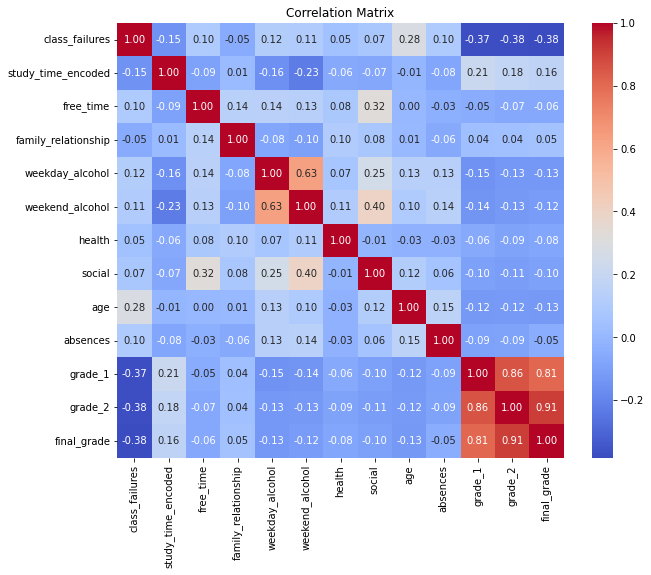

In [45]:
# Chuyển đổi DataFrame PySpark thành DataFrame pandas
pandas_df = df.select("class_failures", "study_time_encoded", "free_time", 
                      "family_relationship", "weekday_alcohol", "weekend_alcohol",
                      "health", "social", "age", "absences",
                      "grade_1", "grade_2", "final_grade").toPandas()

# Vẽ biểu đồ ma trận tương quan bằng seaborn
correlation_matrix = pandas_df.corr()
plt.figure(figsize=(10, 8)) 

# Vẽ heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Các thuộc tính đa phần không có mối tương quan cao. Nhưng còn 1 cặp có độ tương quan là 0.63: 
+ weekday_alcohol - weekdend_alcohol

Nếu cân nhắc loại bỏ 1 trong 2. Nhưng nhóm chọn bỏ weekend_alcohol vì có sự tương quan hơn với social - học sinh có mức xã giao cao. 

-> Loại weekdend_alcohol

+ grade_1 - grade_2: cần giữ lại cho bước Phân loại

In [46]:
# Loại bỏ thuộc tính weekdend_alcohol
df = df.drop("weekend_alcohol")

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 3.757541 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 3.663051 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: toPandas at /tmp/ipykernel_14509/2035232886.py:5
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 82 (toPandas at /tmp/ipykernel_14509/2035232886.py:5) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 122 (toPandas at /tmp/ipykernel_14509/2035232886.py:5)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 122 (MapPartitionsRDD[586] at toPandas at /tmp/ipy

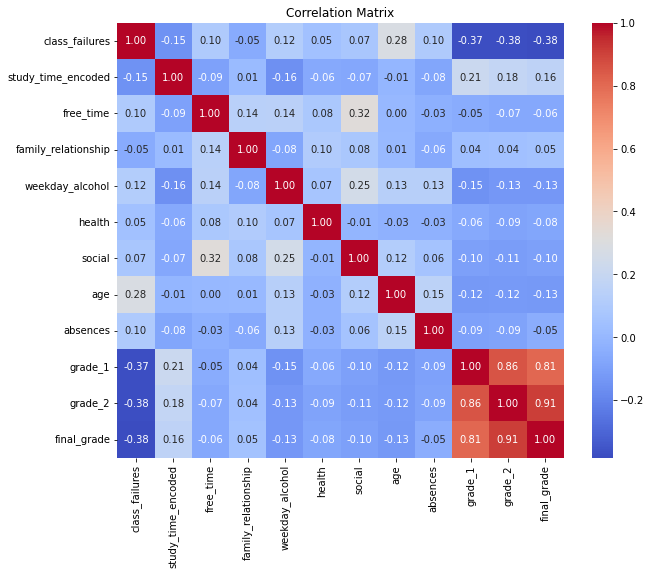

In [47]:
# Chuyển đổi DataFrame PySpark thành DataFrame pandas
pandas_df = df.select("class_failures", "study_time_encoded", "free_time", 
                      "family_relationship", "weekday_alcohol", 
                      "health", "social", "age", "absences",
                      "grade_1", "grade_2", "final_grade").toPandas()

# Vẽ biểu đồ ma trận tương quan bằng seaborn
correlation_matrix = pandas_df.corr()
plt.figure(figsize=(10, 8)) 

# Vẽ heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Model trainning and testing (using KNN)

## KNN Regression: Đối với bài toán dự đoán ta sẽ tiến hành chọn biến mục tiêu là grade_final (điểm trung bình năm học của học sinh)

In [48]:
print(f"Số dòng: {df.count()}")
print(f"Số cột: {len(df.columns)}")

df.show(2)
df.printSchema()

[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 595 (count at NativeMethodAccessorImpl.java:0) as input to shuffle 36
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 83 (count at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 123 (count at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 123 (MapPartitionsRDD[595] at count at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_92 stored as values in memo

Số dòng: 1044
Số cột: 40
+---+--------------+--------------+--------------+------------------+----------+---------+---------------+---------------------+-------------------+---------+------+---------------+------+--------+-------+-------+-----------+------------+---+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------+--------------------+-------------------+------------------+---------------+---------------+--------------+------------------+--------+---------------------+
|age|class_failures|school_support|family_support|extra_paid_classes|activities|higher_ed|internet_access|romantic_relationship|family_relationship|free_time|social|weekday

[Executor task launch worker for task 0.0 in stage 127.0 (TID 125)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 7.582883 ms
[Executor task launch worker for task 0.0 in stage 127.0 (TID 125)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 12.963696 ms
[Executor task launch worker for task 0.0 in stage 127.0 (TID 125)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 127.0 (TID 125). 4955 bytes result sent to driver
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 127.0 (TID 125) in 35 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 127.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 127 (showString at <unknown>:0) finished in 0.038 s
[dag-scheduler-event-loop] INFO

In [49]:
# Chọn feature, tất cả của df ngoài "id" và target
selected_columns = [col for col in df.columns if col not in ["id", "final_grade"]]

In [50]:
df_regression = df.select("id", "final_grade", f.array(*selected_columns).alias("feature"))
df_regression.show(truncate=False)

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_94_piece0 on 192.168.1.24:39111 in memory (size: 28.1 KiB, free: 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_93_piece0 on 192.168.1.24:39111 in memory (size: 5.9 KiB, free: 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_92_piece0 on 192.168.1.24:39111 in memory (size: 16.3 KiB, free: 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_91_piece0 on 192.168.1.24:39111 in memory (size: 18.8 KiB, free: 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_95_piece0 on 192.168.1.24:39111 in memory (size: 30.9 KiB, free: 434.3 MiB)
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data 

+---+-----------+----------------------------------------------------------------------------------------------------------------------+
|id |final_grade|feature                                                                                                               |
+---+-----------+----------------------------------------------------------------------------------------------------------------------+
|1  |6          |[18, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3, 4, 1, 3, 6, 5, 6, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]   |
|2  |6          |[17, 0, 0, 1, 0, 0, 1, 1, 0, 5, 3, 3, 1, 3, 4, 5, 5, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]   |
|3  |10         |[15, 3, 1, 0, 1, 0, 1, 1, 0, 4, 3, 2, 2, 3, 10, 7, 8, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]  |
|4  |15         |[15, 0, 0, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 5, 2, 15, 14, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1] |
|5  |10         |[16, 0, 0, 1, 1, 0, 1, 0

[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at <unknown>:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 627 (showString at <unknown>:0) as input to shuffle 38
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 86 (showString at <unknown>:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 129 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 128)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List(ShuffleMapStage 128)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 128 (MapPartitionsRDD[627] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.Memor

In [51]:
df_regression.printSchema()

root
 |-- id: integer (nullable = false)
 |-- final_grade: integer (nullable = true)
 |-- feature: array (nullable = false)
 |    |-- element: integer (containsNull = true)



In [52]:
train, test = df_regression.randomSplit([0.7, 0.3])

In [53]:
# Train data
train = train.select(col("feature"), col("final_grade"))
train.take(1)

# Test data
test = test.select(col("feature").alias("test_feature"), col("id").alias("test_id")).dropDuplicates()
test.take(1)

[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[dag-scheduler-

[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[dag-scheduler-

[Row(test_feature=[17, 0, 0, 1, 0, 0, 1, 1, 0, 5, 3, 3, 1, 3, 4, 5, 5, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], test_id=2)]

### Mô hình hồi quy K-Nearest Neighbors (KNN) sử dụng Cosine Similarity

In [54]:
def cos(x,y):
    s = 0
    for i,j in zip(x,y):
        s = s + i*j
    return s/(norm(x)*norm(y))

class KNearestNeighborsRegression:
    #khởi tạo và nhận đầu vào
    def __init__(self, train, test, k):
        self.train = train
        self.test = test
        self.k = k
        
    def get_predict(self):
        k = self.k
        tr = self.train
        td = self.test
        join_df = tr.crossJoin(td)
        cos_map_df = join_df\
                    .rdd.map(lambda x: (float(cos(x.feature,x.test_feature)), x.final_grade, x.test_id))\
                    .toDF(["cos", "final_grade", "test_id"])
        windowDept = Window.partitionBy("test_id").orderBy(col("cos").desc(), col("final_grade").desc())
    
        top_k_nearest_items_df = cos_map_df\
                                .withColumn("row",row_number().over(windowDept)).filter(col("row") <= k)
        
        final_grade_predict_df = top_k_nearest_items_df.rdd.map(lambda x: (x.test_id, x.cos*x.final_grade))\
                                                    .reduceByKey(add)\
                                                    .map(lambda x: (x[0], (x[1]/k)))\
                                                    .toDF(["id", "final_grade_predict"])\
                                                    .orderBy(col("final_grade_predict").desc())\
                                                    
        return final_grade_predict_df
    
    def evaluate(self):
        k = self.k
        w = self.train.orderBy(f.rand())
        test_size = int(w.count()/4)
        test_df = w.limit(test_size)
        train_df = w.subtract(test_df)
        test_df = test_df.withColumnRenamed("feature", "test_feature")\
                                    .withColumn("test_id", monotonically_increasing_id())
        
        actual_final_grade = test_df.select(col("test_id"), col("final_grade").alias("actual_final_grade"))
        
        join_df = train_df.crossJoin(test_df)
    
        cos_map_df = join_df\
                    .rdd.map(lambda x: (float(cos(x.feature,x.test_feature)), x.final_grade, x.test_id))\
                    .toDF(["cosine_score", "final_grade", "test_id"])
    
        windowDept = Window.partitionBy("test_id").orderBy(col("cosine_score").desc(), col("final_grade").desc())
    
        top_k_nearest_items_df = cos_map_df\
                                .withColumn("row",row_number().over(windowDept)).filter(col("row") <= k)
    
        final_grade_predict_df = top_k_nearest_items_df.rdd.map(lambda x: (x.test_id, x.cosine_score*x.final_grade))\
                                                    .reduceByKey(add)\
                                                    .map(lambda x: (x[0], x[1]/k))\
                                                    .toDF(["test_id", "final_grade_predict"])
        
        join_df = final_grade_predict_df.join(actual_final_grade, ["test_id"])

        # Calculate RMSE, MSE, and MAE
        result_rdd = join_df.rdd.map(lambda x: ((x.final_grade_predict - x.actual_final_grade) ** 2))
        rmse = (result_rdd.reduce(add) / result_rdd.count()) ** 0.5

        mse = (result_rdd.reduce(add) / result_rdd.count())

        result_rdd1 = join_df.select(abs(col("final_grade_predict") - col("actual_final_grade")).alias("mae"))
        mae = result_rdd1.rdd.map(lambda x: x.mae).reduce(add) / result_rdd1.count()

        return {"RMSE": rmse, "MAE": mae, "MSE": mse}

In [55]:

# Function to find the best k
def find_best_k(train, test, k_range):
    best_k = None
    best_metrics = {"RMSE": float("inf"), "MAE": float("inf"), "MSE": float("inf")}
    
    for k in k_range:
        knn = KNearestNeighborsRegression(train, test, k)
        metrics = knn.evaluate()
        print(f"Evaluating k={k}: RMSE={metrics['RMSE']}, MAE={metrics['MAE']}, MSE={metrics['MSE']}")
        
        if metrics["RMSE"] < best_metrics["RMSE"]:
            best_metrics["RMSE"] = metrics["RMSE"]
            best_k_rmse = k
            
        if metrics["MAE"] < best_metrics["MAE"]:
            best_metrics["MAE"] = metrics["MAE"]
            best_k_mae = k
            
        if metrics["MSE"] < best_metrics["MSE"]:
            best_metrics["MSE"] = metrics["MSE"]
            best_k_mse = k

    return {
        "Best k for RMSE": best_k_rmse,
        "Best k for MAE": best_k_mae,
        "Best k for MSE": best_k_mse,
        "Best metrics": best_metrics
    }


In [56]:

k_range = [3, 5, 7, 9, 11]

# Find the best k
best_k = find_best_k(train, test, k_range)
print("Best k values:", best_k)

[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 675 (count at NativeMethodAccessorImpl.java:0) as input to shuffle 41
[dag-scheduler-event-loop] INFO org.apache.spark.sch

[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN

[broadcast-exchange-1] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 39.915622 ms
[broadcast-exchange-1] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 7.077774 ms
[broadcast-exchange-0] INFO org.apache.spark.SparkContext - Starting job: $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 96 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 143 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 142)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGSc

[Executor task launch worker for task 0.0 in stage 147.0 (TID 146)] INFO org.apache.spark.storage.ShuffleBlockFetcherIterator - Getting 2 (125.9 KiB) non-empty blocks including 2 (125.9 KiB) local and 0 (0.0 B) host-local and 0 (0.0 B) push-merged-local and 0 (0.0 B) remote blocks
[Executor task launch worker for task 0.0 in stage 147.0 (TID 146)] INFO org.apache.spark.storage.ShuffleBlockFetcherIterator - Started 0 remote fetches in 0 ms
[Executor task launch worker for task 0.0 in stage 147.0 (TID 146)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 3.926096 ms
[Executor task launch worker for task 0.0 in stage 147.0 (TID 146)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 21.965454 ms
[stdout writer for /usr/bin/python3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 2.780371 ms
[Executor task launch worker for task 0.0 in stage 147.0 (TID 146)] INFO org.apa

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Added broadcast_113_piece0 in memory on 192.168.1.24:39111 (size: 74.1 KiB, free: 434.1 MiB)
[dag-scheduler-event-loop] INFO org.apache.spark.SparkContext - Created broadcast 113 from broadcast at DAGScheduler.scala:1585
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting 1 missing tasks from ShuffleMapStage 152 (PairwiseRDD[751] at reduceByKey at /tmp/ipykernel_14509/1633301326.py:58) (first 15 tasks are for partitions Vector(0))
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Adding task set 152.0 with 1 tasks resource profile 0
[dispatcher-event-loop-0] INFO org.apache.spark.scheduler.TaskSetManager - Starting task 0.0 in stage 152.0 (TID 148) (192.168.1.24, executor driver, partition 0, NODE_LOCAL, 7604 bytes) 
[Executor task launch worker for task 0.0 in stage 152.0 (TID 148)] INFO org.apache.spark.executor.Executor - Running task 0.0 in 

[Thread-3] INFO org.apache.spark.SparkContext - Starting job: reduce at /tmp/ipykernel_14509/1633301326.py:66
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 103 (reduce at /tmp/ipykernel_14509/1633301326.py:66) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 160 (reduce at /tmp/ipykernel_14509/1633301326.py:66)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 159)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 160 (PythonRDD[781] at reduce at /tmp/ipykernel_14509/1633301326.py:66), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_118 stored as values in memory (estimated size 27.5 KiB, free

[stdout writer for /usr/bin/python3] INFO org.apache.spark.api.python.PythonRunner - Times: total = 88, boot = -16, init = 103, finish = 1
[Executor task launch worker for task 0.0 in stage 172.0 (TID 156)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 89, boot = -16, init = 104, finish = 1
[Executor task launch worker for task 0.0 in stage 172.0 (TID 156)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 172.0 (TID 156). 2531 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 172.0 (TID 156) in 98 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 172.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 172 (count at /tmp/ipykernel_14509/1633301326.py:68) finished in 0.100 s
[dag-scheduler-event-loop] INFO org.apac

[stdout writer for /usr/bin/python3] INFO org.apache.spark.api.python.PythonRunner - Times: total = 85, boot = -178, init = 263, finish = 0
[Executor task launch worker for task 0.0 in stage 179.0 (TID 160)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 90, boot = -183, init = 273, finish = 0
[Executor task launch worker for task 0.0 in stage 179.0 (TID 160)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 179.0 (TID 160). 2538 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 179.0 (TID 160) in 104 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 179.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 179 (reduce at /tmp/ipykernel_14509/1633301326.py:71) finished in 0.107 s
[dag-scheduler-event-loop] INFO org.

[Executor task launch worker for task 0.0 in stage 182.0 (TID 163)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 21.609956 ms
[Executor task launch worker for task 0.0 in stage 182.0 (TID 163)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 8.324993 ms
[Executor task launch worker for task 0.0 in stage 182.0 (TID 163)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 182.0 (TID 163). 8163 bytes result sent to driver
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 182.0 (TID 163) in 64 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 182.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 182 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264) finished in 0.069 s

Evaluating k=3: RMSE=1.5693130923218828, MAE=1.216659035873881, MSE=2.4627435817328704


[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 841 (count at NativeMethodAccessorImpl.java:0) as input to shuffle 51
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 114 (count at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 192 (count at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] 

[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN

[broadcast-exchange-5] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_139 stored as values in memory (estimated size 2.0 MiB, free 426.3 MiB)
[broadcast-exchange-5] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_139_piece0 stored as bytes in memory (estimated size 17.5 KiB, free 426.3 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Added broadcast_139_piece0 in memory on 192.168.1.24:39111 (size: 17.5 KiB, free: 434.1 MiB)
[broadcast-exchange-5] INFO org.apache.spark.SparkContext - Created broadcast 139 from $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_124_piece0 on 192.168.1.24:39111 in memory (size: 2.6 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_128_piece0 on 192.168.1.24:39111 in memory (size: 2.3 KiB, free: 434.1 MiB)
[Executor task launch worker for task 0.0 in stage 205.0 (TID 178)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 2328, boot = -827, init = 914, finish = 2241
[Executor task launch worker for task 0.0 in stage 205.0 (TID 178)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 205.0 (TID 178). 12027 bytes result sent to driver
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 205.0 (TID 178) in 2423 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 205.0, whose tasks have all c

[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[broadcast-exchange-7] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 12.293313 ms
[broadcast-exchange-7] INFO org.apache.spark.SparkContext - Starting job: $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 125 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 212 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264)
[dag-scheduler-

[stdout writer for /usr/bin/python3] INFO org.apache.spark.api.python.PythonRunner - Times: total = 88, boot = -229, init = 317, finish = 0
[Executor task launch worker for task 0.0 in stage 216.0 (TID 184)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 114, boot = 3, init = 109, finish = 2
[Executor task launch worker for task 0.0 in stage 216.0 (TID 184)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 216.0 (TID 184). 2538 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 216.0 (TID 184) in 127 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 216.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 216 (reduce at /tmp/ipykernel_14509/1633301326.py:66) finished in 0.129 s
[dag-scheduler-event-loop] INFO org.ap

[stdout writer for /usr/bin/python3] INFO org.apache.spark.api.python.PythonRunner - Times: total = 85, boot = -21, init = 106, finish = 0
[Executor task launch worker for task 0.0 in stage 228.0 (TID 187)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 87, boot = -19, init = 104, finish = 2
[Executor task launch worker for task 0.0 in stage 228.0 (TID 187)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 228.0 (TID 187). 2531 bytes result sent to driver
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 228.0 (TID 187) in 97 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 228.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 228 (count at /tmp/ipykernel_14509/1633301326.py:68) finished in 0.103 s
[dag-scheduler-event-loop] INFO org.apac

[Executor task launch worker for task 0.0 in stage 235.0 (TID 191)] INFO org.apache.spark.storage.ShuffleBlockFetcherIterator - Getting 1 (2.4 KiB) non-empty blocks including 1 (2.4 KiB) local and 0 (0.0 B) host-local and 0 (0.0 B) push-merged-local and 0 (0.0 B) remote blocks
[Executor task launch worker for task 0.0 in stage 235.0 (TID 191)] INFO org.apache.spark.storage.ShuffleBlockFetcherIterator - Started 0 remote fetches in 0 ms
[stdout writer for /usr/bin/python3] INFO org.apache.spark.api.python.PythonRunner - Times: total = 136, boot = -194, init = 329, finish = 1
[Executor task launch worker for task 0.0 in stage 235.0 (TID 191)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 135, boot = -196, init = 331, finish = 0
[Executor task launch worker for task 0.0 in stage 235.0 (TID 191)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 235.0 (TID 191). 2538 bytes result sent to driver
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSe

[Executor task launch worker for task 0.0 in stage 242.0 (TID 195)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 90, boot = -235, init = 324, finish = 1
[Executor task launch worker for task 0.0 in stage 242.0 (TID 195)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 242.0 (TID 195). 3162 bytes result sent to driver
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 242.0 (TID 195) in 101 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 242.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 242 (count at NativeMethodAccessorImpl.java:0) finished in 0.106 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler

Evaluating k=5: RMSE=1.5366776795611328, MAE=1.1251934247056476, MSE=2.361378290861387


[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN

[broadcast-exchange-10] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 23.953885 ms
[broadcast-exchange-11] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 17.237403 ms
[broadcast-exchange-10] INFO org.apache.spark.SparkContext - Starting job: $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264
[broadcast-exchange-11] INFO org.apache.spark.SparkContext - Starting job: $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 142 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 255 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 254)
[dag-scheduler-event-loo

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_164_piece0 on 192.168.1.24:39111 in memory (size: 24.0 KiB, free: 434.0 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_165_piece0 on 192.168.1.24:39111 in memory (size: 39.9 KiB, free: 434.0 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_163_piece0 on 192.168.1.24:39111 in memory (size: 24.0 KiB, free: 434.0 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_166_piece0 on 192.168.1.24:39111 in memory (size: 41.0 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_162_piece0 on 192.168.1.24:39111 in memory (size: 22.2 KiB, free: 434.1 MiB)
[Executor task launch worker for task 0.0 in stage 259.0 (TID 208)] INFO org.apache.spark.api.python.PythonRunner - Time

[Executor task launch worker for task 0.0 in stage 264.0 (TID 210)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 98, boot = -130, init = 219, finish = 9
[Executor task launch worker for task 0.0 in stage 264.0 (TID 210)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 264.0 (TID 210). 13238 bytes result sent to driver
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 264.0 (TID 210) in 118 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 264.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 264 (reduceByKey at /tmp/ipykernel_14509/1633301326.py:58) finished in 0.124 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_171_piece0 on 192.168.1.24:39111 in memory (size: 74.1 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_173_piece0 on 192.168.1.24:39111 in memory (size: 22.2 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_170_piece0 on 192.168.1.24:39111 in memory (size: 70.0 KiB, free: 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_172_piece0 on 192.168.1.24:39111 in memory (size: 6.6 KiB, free: 434.2 MiB)
[broadcast-exchange-12] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 16.434847 ms
[broadcast-exchange-12] INFO org.apache.spark.SparkContext - Starting job: $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264
[dag-scheduler-event-loop] INFO org.ap

[Thread-3] INFO org.apache.spark.SparkContext - Starting job: count at /tmp/ipykernel_14509/1633301326.py:66
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 150 (count at /tmp/ipykernel_14509/1633301326.py:66) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 276 (count at /tmp/ipykernel_14509/1633301326.py:66)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 275)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 276 (PythonRDD[1114] at count at /tmp/ipykernel_14509/1633301326.py:66), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_177 stored as values in memory (estimated size 28.3 KiB, free 42

[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 153 (javaToPython at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 285 (javaToPython at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 285 (MapPartitionsRDD[1127] at javaToPython at NativeMethodAccessorImpl.java:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_180 stored as values in memory (estimated size 65.8 KiB, free 423.3 MiB)
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadca

[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 1150 (count at NativeMethodAccessorImpl.java:0) as input to shuffle 69
[dag-scheduler-event-loop] INFO org.apache.spark.sc

[Executor task launch worker for task 0.0 in stage 298.0 (TID 226)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 82, boot = -184, init = 266, finish = 0
[Executor task launch worker for task 0.0 in stage 298.0 (TID 226)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 298.0 (TID 226). 3162 bytes result sent to driver
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 298.0 (TID 226) in 87 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 298.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 298 (count at NativeMethodAccessorImpl.java:0) finished in 0.090 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler 

Evaluating k=7: RMSE=2.0703973784636527, MAE=1.2973181444214417, MSE=4.286545304749166


[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Added broadcast_190_piece0 in memory on 192.168.1.24:39111 (size: 37.8 KiB, free: 434.1 MiB)
[dag-scheduler-event-loop] INFO org.apache.spark.SparkContext - Created broadcast 190 from broadcast at DAGScheduler.scala:1585
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting 1 missing tasks from ResultStage 306 (MapPartitionsRDD[1178] at count at NativeMethodAccessorImpl.java:0) (first 15 tasks are for partitions Vector(0))
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Adding task set 306.0 with 1 tasks resource profile 0
[dispatcher-event-loop-0] INFO org.apache.spark.scheduler.TaskSetManager - Starting task 0.0 in stage 306.0 (TID 230) (192.168.1.24, executor driver, partition 0, NODE_LOCAL, 7615 bytes) 
[Executor task launch worker for task 0.0 in stage 306.0 (TID 230)] INFO org.apache.spark.executor.Executor - Running task 0.0 in stage 306.

[Executor task launch worker for task 0.0 in stage 311.0 (TID 237)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 14.139583 ms
[Executor task launch worker for task 0.0 in stage 313.0 (TID 238)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 3.701522 ms
[Executor task launch worker for task 0.0 in stage 311.0 (TID 237)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 311.0 (TID 237). 18726 bytes result sent to driver
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 311.0 (TID 237) in 44 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 311.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 311 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264) finished in 0.049 

[Executor task launch worker for task 0.0 in stage 315.0 (TID 239)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 95, boot = -1033, init = 1128, finish = 0
[Executor task launch worker for task 0.0 in stage 315.0 (TID 239)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 315.0 (TID 239). 11107 bytes result sent to driver
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 315.0 (TID 239) in 119 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 315.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 315 (runJob at PythonRDD.scala:181) finished in 0.128 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 167 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO or

[Executor task launch worker for task 0.0 in stage 320.0 (TID 241)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 107, boot = -128, init = 225, finish = 10
[Executor task launch worker for task 0.0 in stage 320.0 (TID 241)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 320.0 (TID 241). 13238 bytes result sent to driver
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 320.0 (TID 241) in 128 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 320.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 320 (reduceByKey at /tmp/ipykernel_14509/1633301326.py:58) finished in 0.134 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
[dag-scheduler-event-loop] INFO org.apache.spark.schedul

[broadcast-exchange-17] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 11.538763 ms
[broadcast-exchange-17] INFO org.apache.spark.SparkContext - Starting job: $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 171 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 324 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 323)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 324 (MapPartitionsRDD[1274] at $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264

[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 172 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Killing all running tasks in stage 328: Stage finished
[Thread-3] INFO org.apache.spark.scheduler.DAGScheduler - Job 172 finished: reduce at /tmp/ipykernel_14509/1633301326.py:66, took 0.128612 s
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: count at /tmp/ipykernel_14509/1633301326.py:66
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 173 (count at /tmp/ipykernel_14509/1633301326.py:66) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 332 (count at /tmp/ipykernel_14509/1633301326.py:66)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 331)
[dag-scheduler-event-lo

[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN

[stdout writer for /usr/bin/python3] INFO org.apache.spark.api.python.PythonRunner - Times: total = 94, boot = -167, init = 260, finish = 1
[Executor task launch worker for task 0.0 in stage 347.0 (TID 253)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 102, boot = -166, init = 267, finish = 1
[Executor task launch worker for task 0.0 in stage 347.0 (TID 253)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 347.0 (TID 253). 2538 bytes result sent to driver
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 347.0 (TID 253) in 107 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-1] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 347.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 347 (reduce at /tmp/ipykernel_14509/1633301326.py:71) finished in 0.110 s
[dag-scheduler-event-loop] INFO org

[Executor task launch worker for task 0.0 in stage 350.0 (TID 256)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 350.0 (TID 256). 8120 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 350.0 (TID 256) in 46 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 350.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 350 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264) finished in 0.050 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 180 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Killing all running tasks in stage 350: Stage finished
[broadcast-exchange-19] INFO org.apache.spark.s

Evaluating k=9: RMSE=2.013853026696256, MAE=1.2446992153766103, MSE=4.055604013133671


[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 1339 (count at NativeMethodAccessorImpl.java:0) as input to shuffle 81
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 183 (count at NativeMethodAccessorImpl.java:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 360 (count at NativeMethodAccessorImpl.java:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop]

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_219_piece0 on 192.168.1.24:39111 in memory (size: 37.8 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_216_piece0 on 192.168.1.24:39111 in memory (size: 12.0 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_214_piece0 on 192.168.1.24:39111 in memory (size: 37.4 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_218_piece0 on 192.168.1.24:39111 in memory (size: 22.2 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_217_piece0 on 192.168.1.24:39111 in memory (size: 5.9 KiB, free: 434.1 MiB)
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all 

[broadcast-exchange-20] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 13.070803 ms
[broadcast-exchange-21] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 14.891617 ms
[broadcast-exchange-20] INFO org.apache.spark.SparkContext - Starting job: $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 188 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 367 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 366)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.

[Executor task launch worker for task 0.0 in stage 371.0 (TID 270)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 92, boot = -948, init = 1039, finish = 1
[Executor task launch worker for task 0.0 in stage 371.0 (TID 270)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 371.0 (TID 270). 11064 bytes result sent to driver
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 371.0 (TID 270) in 109 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 371.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 371 (runJob at PythonRDD.scala:181) finished in 0.116 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 190 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO org

[Executor task launch worker for task 0.0 in stage 376.0 (TID 272)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 96, boot = -112, init = 192, finish = 16
[Executor task launch worker for task 0.0 in stage 376.0 (TID 272)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 376.0 (TID 272). 13238 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 376.0 (TID 272) in 115 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 376.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 376 (reduceByKey at /tmp/ipykernel_14509/1633301326.py:58) finished in 0.120 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
[dag-scheduler-event-loop] INFO org.apache.spark.schedule

[broadcast-exchange-22] INFO org.apache.spark.SparkContext - Starting job: $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 194 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 380 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List(ShuffleMapStage 379)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 380 (MapPartitionsRDD[1440] at $anonfun$withThreadLocalCaptured$1 at FutureTask.java:264), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_

[stdout writer for /usr/bin/python3] INFO org.apache.spark.api.python.PythonRunner - Times: total = 87, boot = -15, init = 101, finish = 1
[Executor task launch worker for task 0.0 in stage 388.0 (TID 278)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 88, boot = -9, init = 96, finish = 1
[Executor task launch worker for task 0.0 in stage 388.0 (TID 278)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 388.0 (TID 278). 2531 bytes result sent to driver
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 388.0 (TID 278) in 100 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-3] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 388.0, whose tasks have all completed, from pool 
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_231_piece0 on 192.168.1.24:39111 in memory (size: 22.2 KiB, free: 434.0 MiB)
[dag-scheduler-event-loo

[stdout writer for /usr/bin/python3] INFO org.apache.spark.api.python.PythonRunner - Times: total = 87, boot = -10, init = 96, finish = 1
[Executor task launch worker for task 0.0 in stage 396.0 (TID 280)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 88, boot = -9, init = 96, finish = 1
[Executor task launch worker for task 0.0 in stage 396.0 (TID 280)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 396.0 (TID 280). 2531 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 396.0 (TID 280) in 94 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 396.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 396 (count at /tmp/ipykernel_14509/1633301326.py:68) finished in 0.095 s
[dag-scheduler-event-loop] INFO org.apache.

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_228_piece0 on 192.168.1.24:39111 in memory (size: 69.9 KiB, free: 434.2 MiB)
[stdout writer for /usr/bin/python3] INFO org.apache.spark.api.python.PythonRunner - Times: total = 107, boot = -140, init = 247, finish = 0
[Executor task launch worker for task 0.0 in stage 403.0 (TID 284)] INFO org.apache.spark.api.python.PythonRunner - Times: total = 109, boot = -138, init = 247, finish = 0
[Executor task launch worker for task 0.0 in stage 403.0 (TID 284)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 403.0 (TID 284). 2538 bytes result sent to driver
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 403.0 (TID 284) in 116 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-2] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 403.0, whose tasks have all completed, from pool 
[dag-scheduler-eve

Evaluating k=11: RMSE=1.8762435983891022, MAE=1.2494196868078415, MSE=3.5202900404960866
Best k values: {'Best k for RMSE': 5, 'Best k for MAE': 5, 'Best k for MSE': 5, 'Best metrics': {'RMSE': 1.5366776795611328, 'MAE': 1.1251934247056476, 'MSE': 2.361378290861387}}


[Executor task launch worker for task 0.0 in stage 406.0 (TID 287)] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 10.737302 ms
[Executor task launch worker for task 0.0 in stage 406.0 (TID 287)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 406.0 (TID 287). 8120 bytes result sent to driver
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 406.0 (TID 287) in 29 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 406.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 406 ($anonfun$withThreadLocalCaptured$1 at FutureTask.java:264) finished in 0.033 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 203 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-schedu

## KNN Classifier: 

Học sinh được chúng em xếp vào nhóm tốt bằng cách xét điểm thi qua 3 kì học (grade_1, grade_2, final_grade). Nếu cả 3 kì đều có điểm thi là khá trở lên, hoặc học sinh có tiến bộ/không bị rớt điểm trong quá trình thi và điểm thi cuối năm là điểm khá trở lên. Thì sẽ được xếp vào nhóm học tốt (is_good)
     
    (grade_1 + grade_2 + final_grade)/3 >= 14
    hoặc
    (final_grade >= grade_2 và grade_2 >= grade_1 và final_grade >= 14)
    -->  is_good = 1


#### Tham khảo:
    3 học kì trong năm: https://en.wikipedia.org/wiki/Education_in_Portugal#Years_of_schooling
    Phân loại học sinh: https://www.scholaro.com/db/Countries/Portugal/Grading-System
   
     
  

In [57]:
print(f"Số dòng: {df.count()}")
print(f"Số cột: {len(df.columns)}")

df.show(2)
df.printSchema()

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 2.780039 ms
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 1503 (count at <unknown>:0) as input to shuffle 91
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 206 (count at <unknown>:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 416 (count at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 416 (MapPartitionsRDD[1503] at count at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block br

Số dòng: 1044
Số cột: 40
+---+--------------+--------------+--------------+------------------+----------+---------+---------------+---------------------+-------------------+---------+------+---------------+------+--------+-------+-------+-----------+------------+---+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------+--------------------+-------------------+------------------+---------------+---------------+--------------+------------------+--------+---------------------+
|age|class_failures|school_support|family_support|extra_paid_classes|activities|higher_ed|internet_access|romantic_relationship|family_relationship|free_time|social|weekday

[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[Thread-3] WARN org.apache.spark.sql.execution.window.WindowExec - No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
[dispatcher-Blo

In [58]:
# Định nghĩa luật phân loại

condition1 = (col("grade_1") + col("grade_2") + col("final_grade")) / 3 >= 14
condition2 = (col("final_grade") >= col("grade_2")) & (col("grade_2") >= col("grade_1")) & (col("final_grade") >= 14)


df = df.withColumn("is_good", when(condition1 | condition2, 1).otherwise(0))


df.select("grade_1", "grade_2", "final_grade", "is_good").show()

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 5.126245 ms


+-------+-------+-----------+-------+
|grade_1|grade_2|final_grade|is_good|
+-------+-------+-----------+-------+
|      5|      6|          6|      0|
|      5|      5|          6|      0|
|      7|      8|         10|      0|
|     15|     14|         15|      1|
|      6|     10|         10|      0|
|     15|     15|         15|      1|
|     12|     12|         11|      0|
|      6|      5|          6|      0|
|     16|     18|         19|      1|
|     14|     15|         15|      1|
|     10|      8|          9|      0|
|     10|     12|         12|      0|
|     14|     14|         14|      1|
|     10|     10|         11|      0|
|     14|     16|         16|      1|
|     14|     14|         14|      1|
|     13|     14|         14|      1|
|      8|     10|         10|      0|
|      6|      5|          5|      0|
|      8|     10|         10|      0|
+-------+-------+-----------+-------+
only showing top 20 rows



[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 5.236448 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at <unknown>:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 209 (showString at <unknown>:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 421 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 421 (MapPartitionsRDD[1533] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_251 stored as values in memory (estimated size 4

In [59]:
# lọc lại các dòng có is_good = 1
df_is_good = df.filter(df.is_good == 1)

# Đếm tổng số dòng và các dòng có is_good = 1
total_count = df.count()
is_good_count = df_is_good.count()

# Tính tỉ lệ (ratio)
ratio = is_good_count / total_count

print(f"Ratio of rows where is_good = 1: {ratio} ")

# Các dòng có is_good = 1
df_is_good.select("grade_1", "grade_2", "final_grade", "is_good").show(30)

[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Registering RDD 1542 (count at <unknown>:0) as input to shuffle 93
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got map stage job 210 (count at <unknown>:0) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ShuffleMapStage 422 (count at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ShuffleMapStage 422 (MapPartitionsRDD[1542] at count at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_252 stored as values in memory (estimated size 39.3 KiB, free 425.4 MiB)
[dag-scheduler-event-loop] INFO

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Added broadcast_255_piece0 in memory on 192.168.1.24:39111 (size: 5.9 KiB, free: 434.1 MiB)
[dag-scheduler-event-loop] INFO org.apache.spark.SparkContext - Created broadcast 255 from broadcast at DAGScheduler.scala:1585
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting 1 missing tasks from ResultStage 427 (MapPartitionsRDD[1559] at count at <unknown>:0) (first 15 tasks are for partitions Vector(0))
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Adding task set 427.0 with 1 tasks resource profile 0
[dispatcher-event-loop-8] INFO org.apache.spark.scheduler.TaskSetManager - Starting task 0.0 in stage 427.0 (TID 302) (192.168.1.24, executor driver, partition 0, NODE_LOCAL, 7615 bytes) 
[Executor task launch worker for task 0.0 in stage 427.0 (TID 302)] INFO org.apache.spark.executor.Executor - Running task 0.0 in stage 427.0 (TID 302)
[Executor

Ratio of rows where is_good = 1: 0.27011494252873564 
+-------+-------+-----------+-------+
|grade_1|grade_2|final_grade|is_good|
+-------+-------+-----------+-------+
|     15|     14|         15|      1|
|     15|     15|         15|      1|
|     16|     18|         19|      1|
|     14|     15|         15|      1|
|     14|     14|         14|      1|
|     14|     16|         16|      1|
|     14|     14|         14|      1|
|     13|     14|         14|      1|
|     13|     14|         15|      1|
|     12|     15|         15|      1|
|     15|     15|         16|      1|
|     15|     16|         15|      1|
|     17|     16|         17|      1|
|     17|     16|         16|      1|
|     12|     14|         15|      1|
|     15|     16|         18|      1|
|     15|     16|         15|      1|
|     19|     18|         18|      1|
|     19|     19|         20|      1|
|     15|     15|         14|      1|
|     14|     15|         15|      1|
|     14|     15|         15|     

[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_253_piece0 on 192.168.1.24:39111 in memory (size: 5.9 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_250_piece0 on 192.168.1.24:39111 in memory (size: 30.8 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_251_piece0 on 192.168.1.24:39111 in memory (size: 19.2 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_254_piece0 on 192.168.1.24:39111 in memory (size: 23.9 KiB, free: 434.1 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_255_piece0 on 192.168.1.24:39111 in memory (size: 5.9 KiB, free: 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_249_piece0 on 192.168.1

In [60]:
df_classifier = df.drop("grade_1", "grade_2", "final_grade", "id")

In [61]:
df_classifier.show()

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 15.288597 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 15.170958 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at <unknown>:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 215 (showString at <unknown>:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 429 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 429 (MapPartitionsRDD[1579] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] I

+---+--------------+--------------+--------------+------------------+----------+---------+---------------+---------------------+-------------------+---------+------+---------------+------+--------+------------+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------------------+------------------------+---------------------------------------+-------------------------------------------------+------------------------------------+------------------------+--------------------+-------------------+------------------+---------------+---------------+--------------+------------------+--------+---------------------+-------+
|age|class_failures|school_support|family_support|extra_paid_classes|activities|higher_ed|internet_access|romantic_relationship|family_relationship|free_time|social|weekday_alcohol|health|absences|subject_code|mother_educ

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 5.726582 ms


In [62]:
# Chia tập dữ liệu với tỉ lệ train:test là 7:3
train_data, test_data = df_classifier.randomSplit([0.7, 0.3], seed=42)

In [63]:
decision_attribute = 'is_good'
feature_columns = [column for column in df_classifier.columns if column != decision_attribute]

In [64]:
# Hàm tính khoảng cách
def euclidean_distance(row1, row2):
    distance = 0
    for column in feature_columns:
        distance += (row1[column] - row2[column]) ** 2
    return distance**0.5

Sử dụng hàm broadcast để broadcast dữ liệu huấn luyện (train_data.rdd.collect()) từ node chủ đến tất cả các node làm việc. Dữ liệu huấn luyện được thu thập thành một danh sách (list) để broadcast.

Chuyển đổi DataFrame test_data thành một Resilient Distributed Dataset (RDD) để có thể thực hiện các phép biến đổi và hành động xử lý song song

In [65]:
# Broadcast train_data to all worker nodes
broadcast_train_data = sc.broadcast(train_data.rdd.collect())

# Convert the test_data DataFrame to an RDD for parallel processing
test_data_rdd = test_data.rdd

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 6.360384 ms
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 11.583891 ms
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_257_piece0 on 192.168.1.24:39111 in memory (size: 30.4 KiB, free: 434.2 MiB)
[dispatcher-BlockManagerMaster] INFO org.apache.spark.storage.BlockManagerInfo - Removed broadcast_256_piece0 on 192.168.1.24:39111 in memory (size: 23.8 KiB, free: 434.2 MiB)
[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 11.146629 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: collect at /tmp/ipykernel_14509/1984109000.py:2
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 216 (collect at /tmp/ipykernel_14509/1984109000.py:2) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apa


### Step 1 - Tính khoảng cách Euclidean và Tìm k Láng giềng Gần Nhất
1. Tính khoảng cách Euclidean:
+ Duyệt qua mỗi hàng trong tập kiểm thử (test_data_rdd).
+ Với mỗi hàng kiểm thử, tính khoảng cách Euclidean đến mỗi hàng trong tập huấn luyện (train_data_broadcast.value).

2. Lựa chọn k láng giềng gần nhất:

+ Đối với mỗi hàng kiểm thử, tạo một danh sách các khoảng cách Euclidean đến các hàng trong tập huấn luyện cùng với nhãn "is_good" tương ứng.
+ Sắp xếp danh sách này theo thứ tự tăng dần của khoảng cách Euclidean.
+ Giữ lại nhãn "is_good" của mỗi hàng trong tập huấn luyện tương ứng.
+ Lựa chọn k giá trị nhỏ nhất từ danh sách đã sắp xếp.

3. Lưu trữ kết quả cho mỗi hàng kiểm thử:

+ Lưu trữ nhãn "is_good" của k láng giềng gần nhất.
+ Tạo tuples gồm nhãn "is_good" và khoảng cách Euclidean của k láng giềng gần nhất cho mỗi hàng kiểm thử.

4. Kiểm thử với các giá trị k khác nhau:

+ Thực hiện các bước 1-3 với các giá trị k khác nhau để kiểm thử sự ảnh hưởng của giá trị k đối với dự đoán của mô hình (tinh chỉnh siêu tham số - hyperparameter tuning).


In [66]:
# Function to calculate Euclidean distance between two rows
def euclidean_distance(row1, row2):
    distance = 0
    for column in feature_columns:
        distance += (row1[column] - row2[column]) ** 2
    return distance**0.5

k = 10 

# Function to find k neighbors for each test row
def find_neighbors(iter, train_data_broadcast):
    distances = []
    for test_row in iter:
        for train_row in train_data_broadcast.value:
            euc_dist = euclidean_distance(test_row, train_row)
            distances.append((euc_dist, train_row['is_good']))
        distances.sort(key=lambda x: x[0])
        yield distances[:k]

# Use mapPartitions transformation to find neighbors for each test row in parallel
test_neighbors_rdd = test_data_rdd.mapPartitions(lambda iter: find_neighbors(iter, broadcast_train_data))

### Step 2 - Dự đoán

Sử dụng mapPartitions để áp dụng hàm find_neighbors và tìm ra k láng giềng gần nhất cho mỗi hàng trong tập kiểm thử (test_data_rdd) dựa trên tập huấn luyện (broadcast_train_data). Kết quả được lưu trữ trong test_neighbors_rdd.

Sau đó, sử dụng hàm predict_class để dự đoán lớp cho mỗi hàng trong tập kiểm thử dựa trên nhãn của k láng giềng gần nhất.

Kết quả dự đoán được thu thập từ test_predictions_rdd bằng cách sử dụng collect() để có danh sách dự đoán cuối cùng cho tất cả các hàng trong tập kiểm thử, được lưu trữ trong biến test_predictions.

In [67]:
# Use mapPartitions transformation to find neighbors for each test row in parallel
test_neighbors_rdd = test_data_rdd.mapPartitions(lambda iter: find_neighbors(iter, broadcast_train_data))

# Function to predict classes based on neighbors
def predict_class(neighbors):
    classes = [neighbor[1] for neighbor in neighbors]
    counter = Counter(classes)
    most_common_class = counter.most_common(1)[0][0]
    return most_common_class

# Use map transformation to predict classes for each test row in parallel
test_predictions_rdd = test_neighbors_rdd.map(predict_class)

test_predictions = test_predictions_rdd.collect()

[Thread-3] INFO org.apache.spark.SparkContext - Starting job: collect at /tmp/ipykernel_14509/2497880046.py:14
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 217 (collect at /tmp/ipykernel_14509/2497880046.py:14) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 431 (collect at /tmp/ipykernel_14509/2497880046.py:14)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 431 (PythonRDD[1606] at collect at /tmp/ipykernel_14509/2497880046.py:14), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_260 stored as values in memory (estimated size 138.6 KiB, free 425.4 MiB)
[

### Step 3 - Đánh giá độ chính xác của mô hình

In [68]:
# Lấy nhãn của tập test để tiến hành đánh giá độ chính xác
test_labels = [row['is_good'] for row in test_data.select('is_good').rdd.collect()]

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 3.949709 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: collect at /tmp/ipykernel_14509/411968121.py:2
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 218 (collect at /tmp/ipykernel_14509/411968121.py:2) with 2 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 432 (collect at /tmp/ipykernel_14509/411968121.py:2)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 432 (MapPartitionsRDD[1619] at javaToPython at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore -

In [69]:
# Function to calculate accuracy
def accuracy_score(y_pred, y_test):
    correct_predictions = len([pred for pred, true_label in zip(y_pred, y_test) if pred == true_label])
    total_predictions = len(y_pred)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

In [70]:
# Calculate and print accuracy
accuracy_test = accuracy_score(test_predictions, test_labels)
print('The accuracy score for KNN test is:', accuracy_test)

The accuracy score for KNN test is: 63.81578947368421


### Step 4 - In ra kết quả dự đoán

In [71]:
# Tạo DataFrame từ list của tuples
results_data = [(predicted_label, actual_label) for predicted_label, actual_label in zip(test_predictions, test_labels)]
df_results = spark.createDataFrame(results_data, ["KNN Model Predicted Labels with k=10", "Actual Labels"])

# Hiển thị kết quả
df_results.show()

[Thread-3] INFO org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 2.92442 ms
[Thread-3] INFO org.apache.spark.SparkContext - Starting job: showString at <unknown>:0
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Got job 219 (showString at <unknown>:0) with 1 output partitions
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Final stage: ResultStage 433 (showString at <unknown>:0)
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Parents of final stage: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Missing parents: List()
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Submitting ResultStage 433 (MapPartitionsRDD[1626] at showString at <unknown>:0), which has no missing parents
[dag-scheduler-event-loop] INFO org.apache.spark.storage.memory.MemoryStore - Block broadcast_262 stored as values in memory (estimated size 12

+------------------------------------+-------------+
|KNN Model Predicted Labels with k=10|Actual Labels|
+------------------------------------+-------------+
|                                   0|            0|
|                                   0|            1|
|                                   0|            1|
|                                   0|            0|
|                                   0|            1|
|                                   0|            0|
|                                   0|            1|
|                                   0|            0|
|                                   0|            1|
|                                   0|            1|
|                                   0|            1|
|                                   0|            1|
|                                   0|            0|
|                                   0|            0|
|                                   0|            1|
|                                   1|        

[Executor task launch worker for task 0.0 in stage 433.0 (TID 311)] INFO org.apache.spark.executor.Executor - Finished task 0.0 in stage 433.0 (TID 311). 1864 bytes result sent to driver
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 433.0 (TID 311) in 95 ms on 192.168.1.24 (executor driver) (1/1)
[task-result-getter-0] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Removed TaskSet 433.0, whose tasks have all completed, from pool 
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - ResultStage 433 (showString at <unknown>:0) finished in 0.098 s
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.DAGScheduler - Job 219 is finished. Cancelling potential speculative or zombie tasks for this job
[dag-scheduler-event-loop] INFO org.apache.spark.scheduler.TaskSchedulerImpl - Killing all running tasks in stage 433: Stage finished
[Thread-3] INFO org.apache.spark.scheduler.DAGScheduler - Job 219 finished: sho